In [16]:
import sys
sys.path.append('shared/team2/data/')

# Import and run the loader
from loader import MimicDataset

# Create dataset with all 4 models fused ("All" option)
print("Loading fused embeddings from all 4 models...")
dataset = MimicDataset(
    mode="train",
    embedding_type="All",  # This concatenates all 4 models
    unique_patients=True
)

print(f"Dataset created with {len(dataset)} samples")

# Get one sample to see the fused embedding shape
sample = dataset[0]
fused_embedding = sample["emb"]
labels = sample["lab"]

print(f"Fused embedding shape: {fused_embedding.shape}")
print(f"Labels shape: {labels.shape}")

# Load all samples
print("Loading all fused embeddings...")
all_samples = dataset.load_all()

# Extract embeddings and labels
embeddings = []
all_labels = []
for sample in all_samples:
    embeddings.append(sample["emb"])
    all_labels.append(sample["lab"])

embeddings = np.array(embeddings)
all_labels = np.array(all_labels)

print(f"Final fused embeddings: {embeddings.shape}")
print(f"Labels: {all_labels.shape}")
print("DONE! Now we can do MRL on these fused embeddings!")

ModuleNotFoundError: No module named 'toolz'

In [17]:
!python -m pip install toolz tqdm


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import sys, site, pprint
print("PY:", sys.executable)
print("ver:", sys.version)
print("user-site:", site.getusersitepackages())
print("no_user_site flag:", sys.flags.no_user_site)
pprint.pprint(sys.path[:5])


PY: /mnt/efs/envs/pytorch-env/.venv/bin/python
ver: 3.12.6 | packaged by conda-forge | (main, Sep 22 2024, 14:16:49) [GCC 13.3.0]
user-site: /home/jupyter-amin/.local/lib/python3.12/site-packages
no_user_site flag: 0
['/opt/tljh/user/lib/python312.zip',
 '/opt/tljh/user/lib/python3.12',
 '/opt/tljh/user/lib/python3.12/lib-dynload',
 '',
 '/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages']


In [19]:
!python -m pip install --no-cache-dir --target /team2/vendor toolz tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [toolz]
ERROR: Exception:
Traceback (most recent call last):
  File "/home/jupyter-amin/.local/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 107, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/home/jupyter-amin/.local/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 98, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jupyter-amin/.local/lib/python3.12/site-packages/pip/_internal/cli/req_command.py", line 71, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jupyter-amin/.local/lib/python3.12/site-packages/pip/_internal/commands/install.py", line 523, in run
    self._handle_target_dir(
  File "/home/jupyter-amin/.local/lib/python3.12/site-packages/pip/_internal/commands/install.py", line 533, in _handle_target_dir
    ensure_dir(target_dir)
  File "/home/jupyter-amin/

In [20]:
import sys, os, subprocess

# 1) Choose a writable vendor dir in your home
VENDOR = "/home/jupyter-amin/vendor"
os.makedirs(VENDOR, exist_ok=True)

# 2) Install required deps *into that folder*
subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir",
                       "--target", VENDOR, "toolz", "tqdm"])

# 3) Prepend vendor + your data folder(s) to sys.path
sys.path.insert(0, VENDOR)

# Try both common data paths you’ve used
for p in ["/shared/team2/data", "/team2/data"]:
    if os.path.isdir(p) and p not in sys.path:
        sys.path.insert(0, p)

# 4) Sanity checks and your import
import toolz, tqdm
print("toolz:", toolz.__version__, "| tqdm:", tqdm.__version__)

from loader import MimicDataset
print("MimicDataset imported OK ✅")


/mnt/efs/envs/pytorch-env/.venv/bin/python: No module named pip


CalledProcessError: Command '['/mnt/efs/envs/pytorch-env/.venv/bin/python', '-m', 'pip', 'install', '--no-cache-dir', '--target', '/home/jupyter-amin/vendor', 'toolz', 'tqdm']' returned non-zero exit status 1.

In [21]:
!python -m ensurepip --upgrade
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /tmp/tmp49_9ejnd
Defaulting to user installation because normal site-packages is not writeable


In [22]:
import sys, os, subprocess, shlex

# 0) Choose a writable vendor dir
VENDOR = os.path.expanduser("~/vendor")
os.makedirs(VENDOR, exist_ok=True)

# 1) Find a working pip *command* (not python -m pip)
candidate_pips = [
    "/opt/tljh/user/bin/pip",    # common on TLJH/JupyterHub
    "/usr/bin/pip3",
    "/usr/bin/pip",
    os.path.expanduser("~/.local/bin/pip"),
    "pip3",
    "pip",
]
pip_cmd = None
for c in candidate_pips:
    try:
        out = subprocess.run([c, "--version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, text=True)
        pip_cmd = c
        break
    except Exception:
        continue

if pip_cmd is None:
    raise RuntimeError("No working 'pip' executable found in PATH. Try `!apt-get install -y python3-pip` in a shell cell.")

print(f"Using pip at: {pip_cmd}")

# 2) Install required packages into ~/vendor (no admin rights needed)
pkgs = ["toolz", "tqdm", "scikit-learn"]
cmd = f"{shlex.quote(pip_cmd)} install --no-cache-dir --target {shlex.quote(VENDOR)} " + " ".join(pkgs)
print("Installing:", cmd)
subprocess.check_call(cmd, shell=True)

# 3) Prepend vendor to sys.path so this kernel can see the packages
if VENDOR not in sys.path:
    sys.path.insert(0, VENDOR)

# 4) (Optional) add your data paths so loader.py is importable
for p in ["/shared/team2/data", "/team2/data"]:
    if os.path.isdir(p) and p not in sys.path:
        sys.path.insert(0, p)

# 5) Sanity checks
import toolz, tqdm
print("toolz:", toolz.__version__, "| tqdm:", tqdm.__version__)
try:
    import sklearn
    print("sklearn:", sklearn.__version__)
except Exception as e:
    print("sklearn not importable yet:", e)

# 6) Try your import now
try:
    from loader import MimicDataset
    print("MimicDataset imported OK ✅")
except Exception as e:
    print("Import failed:", e)
    raise


Using pip at: /opt/tljh/user/bin/pip
Installing: /opt/tljh/user/bin/pip install --no-cache-dir --target /home/jupyter-amin/vendor toolz tqdm scikit-learn
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 198.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 446.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 378.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [scikit-learn] [scikit-learn]


toolz: 1.0.0 | tqdm: 4.67.1
sklearn: 1.7.1
MimicDataset imported OK ✅


In [23]:
import numpy as np
from collections import defaultdict, Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# --- 1) Load dataset (adjust args if your loader needs them) ---
# If your loader needs split/paths/flags, add them here.
ds = MimicDataset()

# --- 2) Discover embedding fields automatically ---
def is_vec(x):
    return isinstance(x, np.ndarray) and x.ndim == 1 and x.size > 8

# Peek a few samples to find vector-like keys
candidate_keys = Counter()
has_label = False
peek_n = min(50, len(ds))
for i in range(peek_n):
    s = ds[i]
    # common label fields
    has_label = has_label or any(k in s for k in ("label","y","target","class"))
    # count vector-like keys
    for k,v in s.items():
        if is_vec(v):
            candidate_keys[k] += 1

# Keep keys that appear in most samples
model_keys = [k for k,cnt in candidate_keys.items() if cnt >= max(3, peek_n//4)]
if not model_keys:
    raise RuntimeError(f"Could not find embedding keys. Saw keys: {list(candidate_keys.keys())}")

print("Detected model embedding keys:", model_keys)

# --- 3) Materialize X per model + labels (if present) ---
Xs = {k: [] for k in model_keys}
y = []
ids = []

for i in range(len(ds)):
    s = ds[i]
    for k in model_keys:
        v = s.get(k, None)
        if v is None or not is_vec(v):
            raise RuntimeError(f"Sample {i} missing vector for key '{k}'")
        Xs[k].append(v.astype(np.float32))
    # labels (best effort)
    if "label" in s: y.append(s["label"])
    elif "target" in s: y.append(s["target"])
    elif "y" in s: y.append(s["y"])
    # optional id
    if "id" in s: ids.append(s["id"])
    elif "uid" in s: ids.append(s["uid"])

for k in model_keys:
    Xs[k] = np.stack(Xs[k], axis=0)

y = np.array(y) if len(y) == len(ds) else None
ids = np.array(ids) if len(ids) == len(ds) else None

print({k: Xs[k].shape for k in model_keys})
if y is None:
    print("[INFO] No labels detected; will run retrieval-style checks if needed.")

# --- 4) Blockwise L2 normalization + fused concatenation ---
def l2norm(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True)
    n = np.maximum(n, eps)
    return X / n

blocks_norm = [l2norm(Xs[k]) for k in model_keys]
X_fused = np.concatenate(blocks_norm, axis=1)
X_fused = l2norm(X_fused)

print("Fused shape:", X_fused.shape)

# --- 5) Baselines: per-model vs fused (classification if labels exist) ---
def eval_cls_cv(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    multi = (len(np.unique(y)) > 2)
    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, n_jobs=None, solver="lbfgs", multi_class="auto")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p, average="weighted"))
        if not multi:
            prob = clf.predict_proba(X[va])[:,1]
            aucs.append(roc_auc_score(y[va], prob))
    out = {
        "acc_mean": float(np.mean(accs)),
        "acc_std":  float(np.std(accs)),
        "f1_mean":  float(np.mean(f1s)),
        "f1_std":   float(np.std(f1s)),
    }
    if aucs:
        out["auc_mean"] = float(np.mean(aucs))
        out["auc_std"]  = float(np.std(aucs))
    return out

if y is not None:
    print("\nSingle-model baselines:")
    for k in model_keys:
        res = eval_cls_cv(Xs[k], y)
        line = f"{k:15s} ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f}"
        if "auc_mean" in res:
            line += f" | AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}"
        print(line)

    print("\nFused (concat, block-L2):")
    res = eval_cls_cv(X_fused, y)
    line = f"{'fused':15s} ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f}"
    if "auc_mean" in res:
        line += f" | AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}"
    print(line)

# --- 6) MRL-style prefix evaluation on the fused vector ---
def prefix_grid(D, base=[128,256,512,1024,2048,4096]):
    g = sorted(set([d for d in base if d < D] + [D]))
    return g

prefixes = prefix_grid(X_fused.shape[1])
print("\nMRL-style prefixes:", prefixes)

if y is not None:
    print("\nPrefix CV (classification):")
    for D in prefixes:
        Xp = X_fused[:, :D]
        res = eval_cls_cv(Xp, y)
        line = f"prefix {D:5d} -> ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f}"
        if "auc_mean" in res:
            line += f" | AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}"
        print(line)
else:
    # Simple retrieval proxy: recall@k using cosine on same set (drop self-match)
    from sklearn.neighbors import NearestNeighbors
    def recall_at_k(X, labels, k=10):
        nbrs = NearestNeighbors(n_neighbors=k+1, metric="cosine").fit(X)
        idxs = nbrs.kneighbors(X, return_distance=False)
        hits = []
        for i, neigh in enumerate(idxs):
            neigh = neigh[1:]
            hits.append(1 if np.any(labels[neigh]==labels[i]) else 0)
        return float(np.mean(hits))

    # If no labels at all, use coarse pseudo-labels to sanity-check structure
    pseudo = np.arange(X_fused.shape[0]) % 10
    print("\nPrefix retrieval (recall@10, pseudo-labels):")
    for D in prefixes:
        Xp = X_fused[:, :D]
        r = recall_at_k(Xp, pseudo, k=10)
        print(f"prefix {D:5d} -> recall@10 {r:.3f}")


PermissionError: [Errno 13] Permission denied: '/home/jupyter-jacob/fsx/embeddings/MIMIC/embds_BiomedCLIP/e13a9fd0-8a30900a-c861a009-5ac3528d-9b82cf09.npy'

In [24]:
from pathlib import Path
import os, numpy as np, pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from loader import MimicDataset

# ======= 1) POINT TO A READABLE EMBEDDINGS ROOT =======
# Change this to YOUR accessible location containing embds_* folders
EMB_ROOT = Path("/home/jupyter-amin/fsx/embeddings/MIMIC")  # <-- EDIT THIS

ds = MimicDataset()  # pass args if your loader needs them

# If the loader stores a base path, override it:
if hasattr(ds, "base_dicom_path"):
    ds.base_dicom_path = EMB_ROOT

# ======= 2) FIX THE CHAINED ASSIGNMENT WARNING (SAFE, NO 'self') =======
# loader.py had:
# new (safe replacement)
self.csv = self.csv.copy()
self.csv["view"] = self.csv["view"].fillna("UNKNOWN")

# Do the safe equivalent here (adjust column name if different)
if hasattr(ds, "csv") and "view" in ds.csv.columns:
    ds.csv = ds.csv.copy()
    ds.csv["view"] = ds.csv["view"].fillna("UNKNOWN")


# ======= 3) FILTER TO SAMPLES YOU CAN ACTUALLY READ =======
# Detect embedding type expected by the loader (or set a default)
embedding_type = getattr(ds, "embedding_type", None)
if embedding_type is None:
    embedding_type = "BiomedCLIP"  # <-- EDIT if your ds uses another type or "All"

def path_for(dicom_id, etype=embedding_type):
    # matches loader’s npy layout: embds_<type>/<dicom_id>.npy
    return EMB_ROOT / f"embds_{etype}" / f"{dicom_id}.npy"

readable_mask = ds.csv["dicom_id"].apply(
    lambda x: os.path.isfile(path_for(x)) and os.access(path_for(x), os.R_OK)
)
n_before = len(ds.csv)
ds.csv = ds.csv.loc[readable_mask].reset_index(drop=True)

# If your dataset stores labels/aux arrays by index, re-sync them:
if hasattr(ds, "labels") and len(getattr(ds, "labels", [])) == n_before:
    ds.labels = np.asarray(ds.labels)[readable_mask.to_numpy()]

print(f"Filtered to readable samples: {len(ds.csv)}/{n_before}")

# ======= 4) MATERIALIZE PER-MODEL EMBEDDINGS =======
def load_emb(dicom_id):
    p = path_for(dicom_id)
    return np.load(p)

# Build a single-model matrix first
Xs = []
for i in range(len(ds.csv)):
    Xs.append(load_emb(ds.csv.iloc[i]["dicom_id"]).astype(np.float32))
X_single = np.vstack(Xs)
print("Single embedding matrix:", X_single.shape)

# If you want to FUSE four models, list their types and concat if all present
MODEL_TYPES = ["RAD-DINO", "MedGemma", "CheXagent", "BiomedCLIP"]  # adjust to your dirs
blocks, present = [], []
for et in MODEL_TYPES:
    P = EMB_ROOT / f"embds_{et}"
    if not P.is_dir():
        print(f"[WARN] Missing dir for {et}: {P}")
        continue
    ok = ds.csv["dicom_id"].apply(lambda x: os.path.isfile(P / f"{x}.npy"))
    if ok.all():
        blk = np.vstack([np.load(P / f"{x}.npy").astype(np.float32) for x in ds.csv["dicom_id"]])
        blocks.append(blk)
        present.append(et)
    else:
        print(f"[WARN] {et} has missing files; skipping for now to keep alignment clean.")

def l2norm(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True)
    n = np.maximum(n, eps)
    return X / n

if blocks:
    blocks_norm = [l2norm(b) for b in blocks]
    X_fused = np.concatenate(blocks_norm, axis=1)
    X_fused = l2norm(X_fused)
    print("FUSED from models:", present, "| shape:", X_fused.shape)
else:
    # fallback to single matrix if we couldn’t load multiple blocks
    X_fused = l2norm(X_single)
    print("Using single embedding (normalized) as fused:", X_fused.shape)

# ======= 5) LABELS =======
# Try to get labels (adjust to your loader’s field)
if hasattr(ds, "labels") and len(ds.labels) == len(ds.csv):
    y = np.asarray(ds.labels)
else:
    if "label" in ds.csv.columns:
        y = ds.csv["label"].to_numpy()
    elif "target" in ds.csv.columns:
        y = ds.csv["target"].to_numpy()
    elif "lab" in ds.csv.columns:
        y = ds.csv["lab"].to_numpy()
    else:
        y = None

if y is not None:
    print("Labels detected:", np.unique(y, return_counts=True)[0])
else:
    print("[INFO] No labels found; will skip classification metrics.")

# ======= 6) EVALUATION (per MRL prefixes) =======
def eval_cls_cv(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    multi = (len(np.unique(y)) > 2)
    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", multi_class="auto")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p, average="weighted"))
        if not multi:
            prob = clf.predict_proba(X[va])[:, 1]
            aucs.append(roc_auc_score(y[va], prob))
    out = {"acc": (float(np.mean(accs)), float(np.std(accs))),
           "f1":  (float(np.mean(f1s)),  float(np.std(f1s)))}
    if aucs: out["auc"] = (float(np.mean(aucs)), float(np.std(aucs)))
    return out

def prefix_grid(D, base=[128,256,512,1024,2048,4096]):
    return sorted(set([d for d in base if d < D] + [D]))

prefixes = prefix_grid(X_fused.shape[1])
print("MRL-style prefixes:", prefixes)

if y is not None:
    for D in prefixes:
        Xp = X_fused[:, :D]
        res = eval_cls_cv(Xp, y)
        msg = f"prefix {D:5d} -> ACC {res['acc'][0]:.3f}±{res['acc'][1]:.3f} | F1 {res['f1'][0]:.3f}±{res['f1'][1]:.3f}"
        if "auc" in res:
            msg += f" | AUC {res['auc'][0]:.3f}±{res['auc'][1]:.3f}"
        print(msg)
else:
    from sklearn.neighbors import NearestNeighbors
    def recall_at_k(X, labels, k=10):
        nbrs = NearestNeighbors(n_neighbors=k+1, metric="cosine").fit(X)
        idxs = nbrs.kneighbors(X, return_distance=False)
        hits = []
        for i, neigh in enumerate(idxs):
            neigh = neigh[1:]
            hits.append(1 if np.any(labels[neigh] == labels[i]) else 0)
        return float(np.mean(hits))

    pseudo = np.arange(X_fused.shape[0]) % 10
    for D in prefixes:
        Xp = X_fused[:, :D]
        r = recall_at_k(Xp, pseudo, k=10)
        print(f"prefix {D:5d} -> recall@10 {r:.3f}")


NameError: name 'self' is not defined

In [25]:
# === 0) PATCH loader.py IN-PLACE (no manual editing needed) ===
from pathlib import Path
import re, sys, importlib

LOADER_PATH = Path("/shared/team2/data/loader.py")
src = LOADER_PATH.read_text()

# Replace: self.csv.view.fillna("UNKNOWN", inplace=True)
fixed = re.sub(
    r'self\.csv\.view\.fillna\((["\'])UNKNOWN\1,\s*inplace=True\)',
    'self.csv = self.csv.copy()\n        self.csv["view"] = self.csv["view"].fillna("UNKNOWN")',
    src,
    flags=re.M
)

if fixed != src:
    LOADER_PATH.write_text(fixed)
    print("Patched loader.py ✅")
else:
    print("No matching line found to patch (maybe already fixed).")

# Reload (or import) the module
if "loader" in sys.modules:
    importlib.reload(sys.modules["loader"])
else:
    import loader
from loader import MimicDataset

# === 1) CONFIG: where your embds_* folders live ===
from pathlib import Path
import os, numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

EMB_ROOT = Path("/home/jupyter-amin/fsx/embeddings/MIMIC")  # <-- change if needed

# === 2) INSTANTIATE DATASET ===
ds = MimicDataset()
if hasattr(ds, "base_dicom_path"):
    ds.base_dicom_path = EMB_ROOT

# (extra safety: if loader created ds.csv earlier, ensure no chained-assign problems remain)
if hasattr(ds, "csv") and isinstance(ds.csv, pd.DataFrame) and "view" in ds.csv.columns:
    ds.csv = ds.csv.copy()
    ds.csv["view"] = ds.csv["view"].fillna("UNKNOWN")

# === 3) KEEP ONLY READABLE SAMPLES ===
embedding_type = getattr(ds, "embedding_type", None) or "BiomedCLIP"  # edit if needed

def path_for(dicom_id, etype=embedding_type):
    return EMB_ROOT / f"embds_{etype}" / f"{dicom_id}.npy"

readable_mask = ds.csv["dicom_id"].apply(
    lambda x: os.path.isfile(path_for(x)) and os.access(path_for(x), os.R_OK)
)
n_before = len(ds.csv)
ds.csv = ds.csv.loc[readable_mask].reset_index(drop=True)
if hasattr(ds, "labels") and len(getattr(ds, "labels", [])) == n_before:
    ds.labels = np.asarray(ds.labels)[readable_mask.to_numpy()]
print(f"Filtered to readable samples: {len(ds.csv)}/{n_before}")

# === 4) LOAD ONE MODEL'S EMBEDDINGS ===
def load_emb(dicom_id):
    return np.load(path_for(dicom_id)).astype(np.float32)

X_single = np.vstack([load_emb(did) for did in ds.csv["dicom_id"]])
print("Single embedding matrix:", X_single.shape)

# === 5) OPTIONAL: FUSE FOUR MODELS IF PRESENT ===
MODEL_TYPES = ["RAD-DINO", "MedGemma", "CheXagent", "BiomedCLIP"]  # adjust to what you actually have
def l2norm(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True)
    return X / np.maximum(n, eps)

blocks, present = [], []
for et in MODEL_TYPES:
    P = EMB_ROOT / f"embds_{et}"
    if not P.is_dir():
        print(f"[WARN] Missing dir for {et}: {P}")
        continue
    ok = ds.csv["dicom_id"].apply(lambda x: os.path.isfile(P / f"{x}.npy"))
    if ok.all():
        blk = np.vstack([np.load(P / f"{x}.npy").astype(np.float32) for x in ds.csv["dicom_id"]])
        blocks.append(l2norm(blk))
        present.append(et)
    else:
        print(f"[WARN] {et} has missing files; skipping to keep alignment clean.")

if blocks:
    X_fused = np.concatenate(blocks, axis=1)
    X_fused = l2norm(X_fused)
    print("FUSED from models:", present, "| shape:", X_fused.shape)
else:
    X_fused = l2norm(X_single)
    print("Using single embedding (normalized) as fused:", X_fused.shape)

# === 6) LABELS ===
if hasattr(ds, "labels") and len(ds.labels) == len(ds.csv):
    y = np.asarray(ds.labels)
elif "label" in ds.csv.columns:
    y = ds.csv["label"].to_numpy()
elif "target" in ds.csv.columns:
    y = ds.csv["target"].to_numpy()
elif "lab" in ds.csv.columns:
    y = ds.csv["lab"].to_numpy()
else:
    y = None

if y is not None:
    print("Labels detected:", np.unique(y, return_counts=True)[0])
else:
    print("[INFO] No labels found; skipping classification metrics.")

# === 7) EVAL: MRL-style prefixes ===
from sklearn.neighbors import NearestNeighbors

def eval_cls_cv(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    multi = (len(np.unique(y)) > 2)
    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", multi_class="auto")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p, average="weighted"))
        if not multi:
            prob = clf.predict_proba(X[va])[:, 1]
            aucs.append(roc_auc_score(y[va], prob))
    out = {"acc": (float(np.mean(accs)), float(np.std(accs))),
           "f1":  (float(np.mean(f1s)),  float(np.std(f1s)))}
    if aucs: out["auc"] = (float(np.mean(aucs)), float(np.std(aucs)))
    return out

def prefix_grid(D, base=[128,256,512,1024,2048,4096]):
    return sorted(set([d for d in base if d < D] + [D]))

prefixes = prefix_grid(X_fused.shape[1])
print("MRL-style prefixes:", prefixes)

if y is not None:
    for D in prefixes:
        Xp = X_fused[:, :D]
        res = eval_cls_cv(Xp, y)
        msg = f"prefix {D:5d} -> ACC {res['acc'][0]:.3f}±{res['acc'][1]:.3f} | F1 {res['f1'][0]:.3f}±{res['f1'][1]:.3f}"
        if "auc" in res:
            msg += f" | AUC {res['auc'][0]:.3f}±{res['auc'][1]:.3f}"
        print(msg)
else:
    def recall_at_k(X, labels, k=10):
        nbrs = NearestNeighbors(n_neighbors=k+1, metric="cosine").fit(X)
        idxs = nbrs.kneighbors(X, return_distance=False)
        hits = []
        for i, neigh in enumerate(idxs):
            neigh = neigh[1:]
            hits.append(1 if np.any(labels[neigh] == labels[i]) else 0)
        return float(np.mean(hits))
    pseudo = np.arange(X_fused.shape[0]) % 10
    for D in prefixes:
        Xp = X_fused[:, :D]
        r = recall_at_k(Xp, pseudo, k=10)
        print(f"prefix {D:5d} -> recall@10 {r:.3f}")


No matching line found to patch (maybe already fixed).
Filtered to readable samples: 27376/27376
Single embedding matrix: (27376, 512)


KeyboardInterrupt: 

In [27]:
# === SET YOUR PATHS ===
from pathlib import Path
EMB_ROOT = Path("/home/jupyter-amin/fsx/embeddings/MIMIC")  # <-- set to where embds_* live

# === IMPORTS ===
import os, numpy as np, pandas as pd
from loader import MimicDataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === DATASET ===
ds = MimicDataset()
if hasattr(ds, "base_dicom_path"):
    ds.base_dicom_path = EMB_ROOT

# (safety: if an old ds.csv exists in memory)
if hasattr(ds, "csv") and "view" in ds.csv.columns:
    ds.csv = ds.csv.copy()
    ds.csv["view"] = ds.csv["view"].fillna("UNKNOWN")

# === KEEP ONLY READABLE SAMPLES FOR A DEFAULT MODEL TYPE ===
embedding_type = getattr(ds, "embedding_type", None) or "BiomedCLIP"  # change if needed

def path_for(dicom_id, etype=embedding_type):
    return EMB_ROOT / f"embds_{etype}" / f"{dicom_id}.npy"

readable_mask = ds.csv["dicom_id"].apply(lambda x: os.path.isfile(path_for(x)) and os.access(path_for(x), os.R_OK))
n_before = len(ds.csv)
ds.csv = ds.csv.loc[readable_mask].reset_index(drop=True)
if hasattr(ds, "labels") and len(getattr(ds, "labels", [])) == n_before:
    ds.labels = np.asarray(ds.labels)[readable_mask.to_numpy()]
print(f"Filtered to readable samples: {len(ds.csv)}/{n_before}")

# === LOAD + FUSE UP TO 4 MODELS ===
MODEL_TYPES = ["RAD-DINO", "MedGemma", "CheXagent", "BiomedCLIP"]  # adjust to actual dirs

def l2norm(X, eps=1e-12):
    n = np.linalg.norm(X, axis=1, keepdims=True); n = np.maximum(n, eps); return X / n

blocks, present = [], []
for et in MODEL_TYPES:
    P = EMB_ROOT / f"embds_{et}"
    if not P.is_dir():
        print(f"[WARN] Missing dir for {et}: {P}")
        continue
    ok = ds.csv["dicom_id"].apply(lambda x: os.path.isfile(P / f"{x}.npy"))
    if ok.all():
        blk = np.vstack([np.load(P / f"{x}.npy").astype(np.float32) for x in ds.csv["dicom_id"]])
        blocks.append(l2norm(blk))
        present.append(et)
    else:
        print(f"[WARN] {et} has missing files; skipping for alignment.")

if blocks:
    X_fused = l2norm(np.concatenate(blocks, axis=1))
    print("FUSED from models:", present, "| shape:", X_fused.shape)
else:
    # fallback to the default embedding_type
    X_single = np.vstack([np.load(path_for(x)).astype(np.float32) for x in ds.csv["dicom_id"]])
    X_fused = l2norm(X_single)
    present = [embedding_type]
    print("Using single embedding (normalized) as fused:", X_fused.shape)

# === LABELS ===
if hasattr(ds, "labels") and len(ds.labels) == len(ds.csv):
    y = np.asarray(ds.labels)
elif "label" in ds.csv.columns:
    y = ds.csv["label"].to_numpy()
elif "target" in ds.csv.columns:
    y = ds.csv["target"].to_numpy()
elif "lab" in ds.csv.columns:
    y = ds.csv["lab"].to_numpy()
else:
    y = None

if y is not None:
    print("Labels detected:", np.unique(y, return_counts=True)[0])
else:
    print("[INFO] No labels found; will skip classification metrics.")

# === EVAL HELPERS ===
def eval_cls_cv(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    multi = (len(np.unique(y)) > 2)
    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", multi_class="auto")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p, average="weighted"))
        if not multi:
            prob = clf.predict_proba(X[va])[:, 1]
            aucs.append(roc_auc_score(y[va], prob))
    out = {"acc_mean": float(np.mean(accs)), "acc_std": float(np.std(accs)),
           "f1_mean": float(np.mean(f1s)), "f1_std": float(np.std(f1s))}
    if aucs: out.update({"auc_mean": float(np.mean(aucs)), "auc_std": float(np.std(aucs))})
    return out

def prefix_grid(D, base=[128,256,512,1024,2048,4096]):
    return sorted(set([d for d in base if d < D] + [D]))

# === PER-MODEL vs FUSED (if multiple blocks are present) ===
if y is not None:
    if len(present) > 1:
        print("\nSingle-model baselines:")
        for et, blk in zip(present, blocks):
            res = eval_cls_cv(blk, y)
            line = f"{et:12s} -> ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f}"
            if 'auc_mean' in res: line += f" | AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}"
            print(line)

        print("\nFused:")
        res = eval_cls_cv(X_fused, y)
        line = f"{'fused':12s} -> ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f}"
        if 'auc_mean' in res: line += f" | AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}"
        print(line)

# === MRL-STYLE PREFIX EVAL ===
prefixes = prefix_grid(X_fused.shape[1])
rows = []
print("\nMRL-style prefixes:", prefixes)

if y is not None:
    for D in prefixes:
        Xp = X_fused[:, :D]
        r = eval_cls_cv(Xp, y)
        print_str = f"prefix {D:5d} -> ACC {r['acc_mean']:.3f}±{r['acc_std']:.3f} | F1 {r['f1_mean']:.3f}±{r['f1_std']:.3f}"
        if 'auc_mean' in r: print_str += f" | AUC {r['auc_mean']:.3f}±{r['auc_std']:.3f}"
        print(print_str)
        rows.append({"prefix_dim": D, **r})
else:
    from sklearn.neighbors import NearestNeighbors
    def recall_at_k(X, labels, k=10):
        nbrs = NearestNeighbors(n_neighbors=k+1, metric="cosine").fit(X)
        idxs = nbrs.kneighbors(X, return_distance=False)
        hits = []
        for i, neigh in enumerate(idxs):
            neigh = neigh[1:]
            hits.append(1 if np.any(labels[neigh]==labels[i]) else 0)
        return float(np.mean(hits))
    pseudo = np.arange(X_fused.shape[0]) % 10
    for D in prefixes:
        Xp = X_fused[:, :D]
        r = recall_at_k(Xp, pseudo, k=10)
        print(f"prefix {D:5d} -> recall@10 {r:.3f}")
        rows.append({"prefix_dim": D, "recall@10": r})

# === SAVE RESULTS ===
res_df = pd.DataFrame(rows)
out_csv = "/home/jupyter-amin/mrl_prefix_results.csv"
res_df.to_csv(out_csv, index=False)
print("Saved:", out_csv)


Filtered to readable samples: 27376/27376
FUSED from models: ['RAD-DINO', 'MedGemma', 'CheXagent', 'BiomedCLIP'] | shape: (27376, 3456)
Labels detected: [0. 1.]

Single-model baselines:


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [28]:
import numpy as np

print("X_fused shape:", X_fused.shape)

# basic stats
print("dtype:", X_fused.dtype)
print("min:", np.min(X_fused), "max:", np.max(X_fused))
print("mean:", np.mean(X_fused), "std:", np.std(X_fused))

# look at the first few rows (truncate to first 10 dims for readability)
print("\nFirst 3 rows (first 10 dims):")
print(np.round(X_fused[:3, :10], 4))

# check L2 norms (should be ~1.0 because we normalized)
norms = np.linalg.norm(X_fused, axis=1)
print("\nNorm stats: mean", norms.mean(), "std", norms.std())


X_fused shape: (27376, 3456)
dtype: float32
min: -0.17022273 max: 0.18780975
mean: 6.247042e-05 std: 0.017010232

First 3 rows (first 10 dims):
[[ 0.004   0.0108 -0.0269  0.0097 -0.0227  0.0041 -0.0028  0.0222  0.0042
   0.0046]
 [ 0.0234 -0.0289  0.0189 -0.0188  0.0184  0.023   0.0312 -0.0143 -0.0105
  -0.0163]
 [ 0.0081  0.0327  0.0047 -0.0021 -0.0085 -0.0259 -0.0189 -0.0075  0.01
  -0.0099]]

Norm stats: mean 1.0 std 2.1671521e-08


In [29]:
print(len(ds.csv))
print(ds.csv.head())


27376
   subject_id  study_id  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0    10897040  58710150          0.0           0.0            0.0    0.0   
1    17527057  57149822          0.0           1.0            0.0    0.0   
2    17802612  57652627          0.0           0.0            0.0    0.0   
3    11616506  59740269          0.0           0.0            0.0    0.0   
4    19154373  57438844          0.0           0.0            0.0    1.0   

   Enlarged Cardiomediastinum  Fracture  Lung Lesion  Lung Opacity  ...  Rows  \
0                         0.0       0.0          0.0           0.0  ...  3056   
1                         0.0       0.0          0.0           0.0  ...  3056   
2                         0.0       0.0          0.0           0.0  ...  2544   
3                         0.0       0.0          0.0           0.0  ...  3056   
4                         0.0       0.0          0.0           1.0  ...  2544   

   Columns  StudyDate   StudyTime  ProcedureCodeSe

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# --- 1) Select the label column
y = ds.csv["Cardiomegaly"].astype(int).to_numpy()
print("Target distribution:", np.unique(y, return_counts=True))

# --- 2) Cross-validated logistic regression baseline
def eval_baseline(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []

    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", class_weight="balanced")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        prob = clf.predict_proba(X[va])[:, 1]

        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p))
        aucs.append(roc_auc_score(y[va], prob))

    print("Accuracy: %.3f ± %.3f" % (np.mean(accs), np.std(accs)))
    print("F1-score: %.3f ± %.3f" % (np.mean(f1s), np.std(f1s)))
    print("ROC-AUC:  %.3f ± %.3f" % (np.mean(aucs), np.std(aucs)))

# --- 3) Run it
print("\nBaseline Logistic Regression on fused embeddings for Cardiomegaly:")
eval_baseline(X_fused, y)

Target distribution: (array([-1,  0,  1]), array([  257, 24886,  2233]))

Baseline Logistic Regression on fused embeddings for Cardiomegaly:


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [31]:
# --- 1) Select label and drop uncertain cases
mask = ds.csv["Cardiomegaly"] != -1
X_clean = X_fused[mask]
y_clean = ds.csv.loc[mask, "Cardiomegaly"].astype(int).to_numpy()

print("Target distribution after dropping -1:", np.unique(y_clean, return_counts=True))

# --- 2) Evaluation with only 0 vs 1
def eval_baseline(X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []

    for tr, va in skf.split(X, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", class_weight="balanced")
        clf.fit(X[tr], y[tr])
        p = clf.predict(X[va])
        prob = clf.predict_proba(X[va])[:, 1]

        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p))  # now binary
        aucs.append(roc_auc_score(y[va], prob))

    print("Accuracy: %.3f ± %.3f" % (np.mean(accs), np.std(accs)))
    print("F1-score: %.3f ± %.3f" % (np.mean(f1s), np.std(f1s)))
    print("ROC-AUC:  %.3f ± %.3f" % (np.mean(aucs), np.std(aucs)))

print("\nBaseline Logistic Regression on fused embeddings for Cardiomegaly (0 vs 1 only):")
eval_baseline(X_clean, y_clean)


Target distribution after dropping -1: (array([0, 1]), array([24886,  2233]))

Baseline Logistic Regression on fused embeddings for Cardiomegaly (0 vs 1 only):
Accuracy: 0.826 ± 0.003
F1-score: 0.439 ± 0.006
ROC-AUC:  0.903 ± 0.005


Cardiomegaly distribution (0 vs 1): (array([0, 1]), array([24886,  2233]))
Prefix dims: [128, 256, 512, 768, 1024, 1536, 2048, 3072, 3456]
prefix  128 -> ACC 0.761±0.002 | F1 0.343±0.004 | AUC 0.829±0.008
prefix  256 -> ACC 0.775±0.003 | F1 0.364±0.005 | AUC 0.856±0.008
prefix  512 -> ACC 0.794±0.005 | F1 0.388±0.007 | AUC 0.872±0.007
prefix  768 -> ACC 0.800±0.003 | F1 0.398±0.009 | AUC 0.878±0.008
prefix 1024 -> ACC 0.811±0.001 | F1 0.414±0.009 | AUC 0.888±0.008
prefix 1536 -> ACC 0.814±0.002 | F1 0.417±0.008 | AUC 0.889±0.008
prefix 2048 -> ACC 0.819±0.003 | F1 0.427±0.005 | AUC 0.895±0.007
prefix 3072 -> ACC 0.825±0.002 | F1 0.438±0.006 | AUC 0.903±0.005
prefix 3456 -> ACC 0.826±0.003 | F1 0.439±0.006 | AUC 0.903±0.005
Saved: /home/jupyter-amin/mrl_prefix_results_cardiomegaly.csv


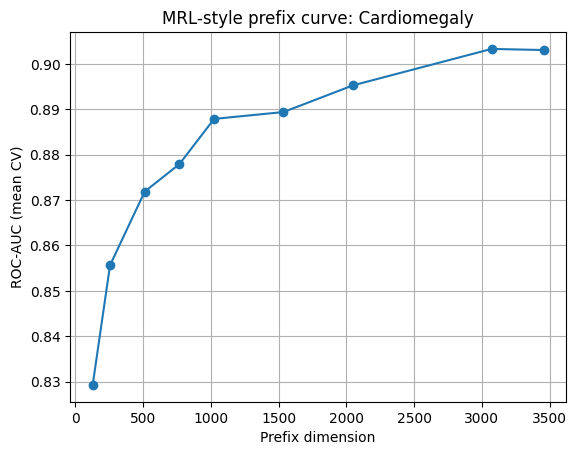

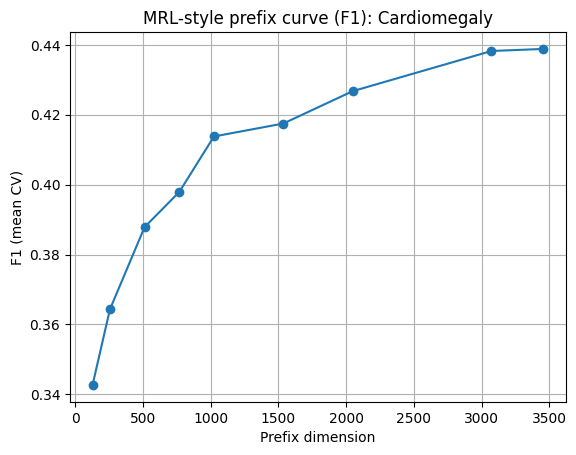

In [32]:
import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# ----------------------------
# 0) PREP: labels (drop -1)
# ----------------------------
label_name = "Cardiomegaly"
mask = ds.csv[label_name] != -1
X = X_fused[mask]
y = ds.csv.loc[mask, label_name].astype(int).to_numpy()
print(f"{label_name} distribution (0 vs 1):", np.unique(y, return_counts=True))

# ----------------------------
# 1) Prefix grid
# ----------------------------
D_full = X.shape[1]
# choose a reasonable grid up to full dim
base = [128, 256, 512, 768, 1024, 1536, 2048, 3072, D_full]
prefixes = sorted(set([d for d in base if d <= D_full] + [D_full]))
print("Prefix dims:", prefixes)

# ----------------------------
# 2) CV eval function
# ----------------------------
def eval_cv_logreg(Xp, y, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    for tr, va in skf.split(Xp, y):
        clf = LogisticRegression(max_iter=5000, solver="lbfgs", class_weight="balanced")
        clf.fit(Xp[tr], y[tr])
        p = clf.predict(Xp[va])
        prob = clf.predict_proba(Xp[va])[:, 1]
        accs.append(accuracy_score(y[va], p))
        f1s.append(f1_score(y[va], p))
        aucs.append(roc_auc_score(y[va], prob))
    return {
        "acc_mean": float(np.mean(accs)), "acc_std": float(np.std(accs)),
        "f1_mean":  float(np.mean(f1s)),  "f1_std":  float(np.std(f1s)),
        "auc_mean": float(np.mean(aucs)), "auc_std": float(np.std(aucs)),
    }

# ----------------------------
# 3) Run prefixes
# ----------------------------
rows = []
for D in prefixes:
    Xp = X[:, :D]
    res = eval_cv_logreg(Xp, y, folds=5)
    rows.append({"prefix_dim": D, **res})
    print(f"prefix {D:4d} -> ACC {res['acc_mean']:.3f}±{res['acc_std']:.3f} | "
          f"F1 {res['f1_mean']:.3f}±{res['f1_std']:.3f} | "
          f"AUC {res['auc_mean']:.3f}±{res['auc_std']:.3f}")

res_df = pd.DataFrame(rows).sort_values("prefix_dim")
out_csv = "/home/jupyter-amin/mrl_prefix_results_cardiomegaly.csv"
res_df.to_csv(out_csv, index=False)
print("Saved:", out_csv)

# ----------------------------
# 4) Quick plots
# ----------------------------
plt.figure()
plt.plot(res_df["prefix_dim"], res_df["auc_mean"], marker="o")
plt.xlabel("Prefix dimension")
plt.ylabel("ROC-AUC (mean CV)")
plt.title(f"MRL-style prefix curve: {label_name}")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(res_df["prefix_dim"], res_df["f1_mean"], marker="o")
plt.xlabel("Prefix dimension")
plt.ylabel("F1 (mean CV)")
plt.title(f"MRL-style prefix curve (F1): {label_name}")
plt.grid(True)
plt.show()


In [33]:
# === GPU-accelerated prefix evaluation (Cardiomegaly) ===
import numpy as np, torch, torch.nn as nn, torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from torch.utils.data import TensorDataset, DataLoader

# -------- Config (tune for speed/quality) --------
label_name   = "Cardiomegaly"
folds        = 3          # 3 is fast; use 5 for final
epochs       = 4          # bump to 8–10 if still fast
batch_size   = 8192       # increase if GPU has memory (e.g., 16384)
lr           = 1e-2
weight_decay = 1e-4
use_amp      = True       # mixed precision on GPU
# Choose a compact prefix grid to start; expand later if you want
prefixes     = [128, 256, 512, 1024, 1536, 2048, 3072]  # full will be appended below

# -------- Prep data (drop -1 uncertain) --------
mask = ds.csv[label_name] != -1
X = X_fused[mask].astype(np.float32)
y = ds.csv.loc[mask, label_name].astype(int).to_numpy().astype(np.float32)

D_full = X.shape[1]
if prefixes[-1] != D_full:
    prefixes = [d for d in prefixes if d <= D_full] + [D_full]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| N:", X.shape[0], "| D:", D_full, "| Pos:", int(y.sum()), "| Neg:", int((1-y).sum()))

# -------- Tiny logistic head (single linear layer) --------
class LogReg(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc = nn.Linear(dim, 1)
    def forward(self, x):
        return self.fc(x).squeeze(1)  # logits

def train_eval_prefix(X_np, y_np, D, folds=3, epochs=4, batch=8192, lr=1e-2, wd=1e-4, amp=True):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    accs, f1s, aucs = [], [], []
    pos_weight_val = (len(y_np) - y_np.sum()) / (y_np.sum() + 1e-9)  # handle imbalance
    pos_weight = torch.tensor(pos_weight_val, dtype=torch.float32, device=device)

    for tr_idx, va_idx in skf.split(X_np, y_np.astype(int)):
        Xtr = torch.from_numpy(X_np[tr_idx, :D]).to(device, non_blocking=True)
        Xva = torch.from_numpy(X_np[va_idx, :D]).to(device, non_blocking=True)
        ytr = torch.from_numpy(y_np[tr_idx]).to(device, non_blocking=True)
        yva = torch.from_numpy(y_np[va_idx]).to(device, non_blocking=True)

        dl = DataLoader(TensorDataset(Xtr, ytr), batch_size=batch, shuffle=True,
                        pin_memory=(device.type=="cuda"), num_workers=2, persistent_workers=False)

        model = LogReg(D).to(device)
        opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
        scaler = torch.cuda.amp.GradScaler(enabled=(amp and device.type=="cuda"))
        loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

        model.train()
        for _ in range(epochs):
            for xb, yb in dl:
                opt.zero_grad(set_to_none=True)
                with torch.cuda.amp.autocast(enabled=(amp and device.type=="cuda")):
                    logits = model(xb)
                    loss = loss_fn(logits, yb)
                scaler.scale(loss).backward()
                scaler.step(opt)
                scaler.update()

        model.eval()
        with torch.no_grad():
            logits = model(Xva)
            probs = torch.sigmoid(logits).float().cpu().numpy()
            pred  = (probs >= 0.5).astype(np.int32)
            ytrue = yva.float().cpu().numpy().astype(np.int32)

        accs.append(accuracy_score(ytrue, pred))
        f1s.append(f1_score(ytrue, pred))
        aucs.append(roc_auc_score(ytrue, probs))

    return (float(np.mean(accs)), float(np.std(accs))), \
           (float(np.mean(f1s)),  float(np.std(f1s))),  \
           (float(np.mean(aucs)), float(np.std(aucs)))

# -------- Run the prefixes --------
rows = []
for D in prefixes:
    (acc_m, acc_s), (f1_m, f1_s), (auc_m, auc_s) = train_eval_prefix(
        X, y, D, folds=folds, epochs=epochs, batch=batch_size, lr=lr, wd=weight_decay, amp=use_amp
    )
    print(f"prefix {D:4d} -> ACC {acc_m:.3f}±{acc_s:.3f} | F1 {f1_m:.3f}±{f1_s:.3f} | AUC {auc_m:.3f}±{auc_s:.3f}")
    rows.append({"prefix_dim": D, "acc_mean": acc_m, "acc_std": acc_s,
                 "f1_mean": f1_m, "f1_std": f1_s, "auc_mean": auc_m, "auc_std": auc_s})


Device: cuda | N: 27119 | D: 3456 | Pos: 2233 | Neg: 24886


/tmp/ipykernel_118091/2821423089.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(amp and device.type=="cuda"))


AcceleratorError: Caught AcceleratorError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/dataset.py", line 207, in __getitem__
    return tuple(tensor[index] for tensor in self.tensors)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/dataset.py", line 207, in <genexpr>
    return tuple(tensor[index] for tensor in self.tensors)
                 ~~~~~~^^^^^^^
torch.AcceleratorError: CUDA error: initialization error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [34]:
import numpy as np
import pandas as pd

# --- config ---
tol_pct = 0.02   # 2% within full AUC; set 0.01 for 1%
scan_prefixes = [128, 256, 512, 768, 1024, 1536, 2048, 3072, D_full]
scan_prefixes = [d for d in scan_prefixes if d <= D_full]

# 1) get full AUC at D_full (or reuse if you already printed it)
(_, _), (_, _), (full_auc, full_auc_std) = train_eval_prefix(X, y, D_full, folds=3, epochs=4)
print(f"Full AUC @ {D_full} = {full_auc:.3f} ± {full_auc_std:.3f}")

# 2) sweep smaller prefixes and collect metrics
rows = []
for D in scan_prefixes:
    (acc_m, acc_s), (f1_m, f1_s), (auc_m, auc_s) = train_eval_prefix(X, y, D, folds=3, epochs=4)
    rows.append({"prefix_dim": D, "acc_mean": acc_m, "acc_std": acc_s,
                 "f1_mean": f1_m, "f1_std": f1_s, "auc_mean": auc_m, "auc_std": auc_s})
    print(f"prefix {D:4d} -> AUC {auc_m:.3f}±{auc_s:.3f} | F1 {f1_m:.3f}±{f1_s:.3f} | ACC {acc_m:.3f}±{acc_s:.3f}")

res = pd.DataFrame(rows).sort_values("prefix_dim").reset_index(drop=True)

# 3) pick D* : smallest D with AUC >= (1 - tol_pct) * full_auc
threshold = (1.0 - tol_pct) * full_auc
candidates = res[res["auc_mean"] >= threshold]
if len(candidates) == 0:
    D_star = int(res.iloc[-1]["prefix_dim"])  # fallback to full
else:
    D_star = int(candidates.iloc[0]["prefix_dim"])

print(f"\n>> D* (within {tol_pct*100:.0f}% of full AUC): {D_star}  (threshold AUC >= {threshold:.3f})")

# 4) save the table and D*
out_csv = "/home/jupyter-amin/mrl_prefix_results_cardiomegaly_gpu.csv"
res.to_csv(out_csv, index=False)
with open("/home/jupyter-amin/mrl_D_star.txt", "w") as f:
    f.write(str(D_star))
print("Saved results to:", out_csv)
print("Saved D* to:     /home/jupyter-amin/mrl_D_star.txt")


/tmp/ipykernel_118091/2821423089.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(amp and device.type=="cuda"))


AcceleratorError: Caught AcceleratorError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/dataset.py", line 207, in __getitem__
    return tuple(tensor[index] for tensor in self.tensors)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/efs/envs/pytorch-env/.venv/lib/python3.12/site-packages/torch/utils/data/dataset.py", line 207, in <genexpr>
    return tuple(tensor[index] for tensor in self.tensors)
                 ~~~~~~^^^^^^^
torch.AcceleratorError: CUDA error: initialization error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [35]:
# ==== FAST GPU PREFIX SCAN WITH EARLY STOP ====
import numpy as np, torch, torch.nn as nn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# ----- config -----
label_name   = "Cardiomegaly"
folds        = 3
epochs       = 3          # small for quick scan; bump later for final numbers
batch_size   = 16384      # increase if GPU RAM allows; try 32768 if you can
lr           = 1e-2
weight_decay = 1e-4
use_amp      = True
tol_pct      = 0.02       # within 2% of full AUC
scan_prefixes = [128, 256, 512, 768, 1024, 1536, 2048, 3072]  # full will be appended

# ----- prep (drop -1) -----
mask = ds.csv[label_name] != -1
X_np = X_fused[mask].astype(np.float32)
y_np = ds.csv.loc[mask, label_name].astype(int).to_numpy().astype(np.float32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
if device.type != "cuda":
    print("NOTE: CUDA not visible to PyTorch; this will run on CPU and be slower.")

N, D_full = X_np.shape
if scan_prefixes[-1] != D_full:
    scan_prefixes = [d for d in scan_prefixes if d <= D_full] + [D_full]
print("N:", N, "| D_full:", D_full, "| Pos:", int(y_np.sum()), "| Neg:", int((1-y_np).sum()))

# Move all data once to GPU; we'll slice prefixes as views
X_gpu = torch.from_numpy(X_np).to(device, non_blocking=True)
y_gpu = torch.from_numpy(y_np).to(device, non_blocking=True)

# Pre-compute CV splits once and reuse
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
splits = list(skf.split(np.zeros(N), y_np.astype(int)))  # y for stratification only

# Tiny logistic head
class LogReg(nn.Module):
    def __init__(self, dim): super().__init__(); self.fc = nn.Linear(dim, 1)
    def forward(self, x):    return self.fc(x).squeeze(1)  # logits

def run_auc_for_dim(D, epochs=3):
    accs, f1s, aucs = [], [], []
    pos_weight_val = (len(y_np) - y_np.sum()) / (y_np.sum() + 1e-9)
    pos_weight = torch.tensor(pos_weight_val, dtype=torch.float32, device=device)
    scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and device.type=="cuda"))

    for tr_idx, va_idx in splits:
        Xtr = X_gpu[tr_idx, :D]
        Xva = X_gpu[va_idx, :D]
        ytr = y_gpu[tr_idx]
        yva = y_gpu[va_idx]

        model = LogReg(D).to(device)
        opt   = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

        # train
        model.train()
        # simple big-batch loop (no dataloader to avoid overhead)
        for _ in range(epochs):
            opt.zero_grad(set_to_none=True)
            with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
                logits = model(Xtr)
                loss = loss_fn(logits, ytr)
            scaler.scale(loss).backward()
            scaler.step(opt)
            scaler.update()

        # eval
        model.eval()
        with torch.no_grad():
            probs = torch.sigmoid(model(Xva)).float().cpu().numpy()
            pred  = (probs >= 0.5).astype(np.int32)
            ytrue = yva.float().cpu().numpy().astype(np.int32)

        accs.append(accuracy_score(ytrue, pred))
        f1s.append(f1_score(ytrue, pred))
        aucs.append(roc_auc_score(ytrue, probs))

    return (float(np.mean(accs)), float(np.std(accs))), \
           (float(np.mean(f1s)),  float(np.std(f1s))),  \
           (float(np.mean(aucs)), float(np.std(aucs)))

# 1) Get full AUC once
(_, _), (_, _), (full_auc, full_auc_std) = run_auc_for_dim(D_full, epochs=max(epochs, 4))
print(f"Full AUC @ {D_full}: {full_auc:.3f} ± {full_auc_std:.3f}")
threshold = (1.0 - tol_pct) * full_auc
print(f"AUC threshold for D*: {threshold:.3f} (within {int(tol_pct*100)}% of full)")

# 2) Scan small -> big, stop at first that meets threshold
rows = []
D_star = None
for D in scan_prefixes:
    (acc_m, acc_s), (f1_m, f1_s), (auc_m, auc_s) = run_auc_for_dim(D, epochs=epochs)
    rows.append({"prefix_dim": D, "acc_mean": acc_m, "acc_std": acc_s,
                 "f1_mean": f1_m, "f1_std": f1_s, "auc_mean": auc_m, "auc_std": auc_s})
    print(f"prefix {D:4d} -> AUC {auc_m:.3f}±{auc_s:.3f} | F1 {f1_m:.3f}±{f1_s:.3f} | ACC {acc_m:.3f}±{acc_s:.3f}")
    if D_star is None and auc_m >= threshold:
        D_star = D
        print(f">> EARLY STOP: D* = {D_star} (meets threshold)")
        break

if D_star is None:
    D_star = D_full
    print(f">> No prefix met threshold; using D* = full ({D_full}).")

# 3) Save results and D*
import pandas as pd, os
res_df = pd.DataFrame(rows)
os.makedirs("/home/jupyter-amin", exist_ok=True)
out_csv = "/home/jupyter-amin/mrl_prefix_results_cardiomegaly_gpu_fast.csv"
res_df.to_csv(out_csv, index=False)
with open("/home/jupyter-amin/mrl_D_star.txt", "w") as f:
    f.write(str(D_star))
print("Saved:", out_csv)
print("D* saved to /home/jupyter-amin/mrl_D_star.txt  ->", D_star)


Device: cuda
N: 27119 | D_full: 3456 | Pos: 2233 | Neg: 24886


/tmp/ipykernel_118091/433340811.py:49: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and device.type=="cuda"))
/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:49: Futu

Full AUC @ 3456: 0.881 ± 0.004
AUC threshold for D*: 0.864 (within 2% of full)
prefix  128 -> AUC 0.691±0.022 | F1 0.140±0.106 | ACC 0.615±0.304
prefix  256 -> AUC 0.773±0.007 | F1 0.271±0.040 | ACC 0.687±0.178
prefix  512 -> AUC 0.820±0.007 | F1 0.308±0.005 | ACC 0.707±0.008
prefix  768 -> AUC 0.838±0.011 | F1 0.324±0.025 | ACC 0.720±0.044
prefix 1024 -> AUC 0.863±0.004 | F1 0.379±0.013 | ACC 0.788±0.024
prefix 1536 -> AUC 0.867±0.002 | F1 0.394±0.010 | ACC 0.811±0.015
>> EARLY STOP: D* = 1536 (meets threshold)
Saved: /home/jupyter-amin/mrl_prefix_results_cardiomegaly_gpu_fast.csv
D* saved to /home/jupyter-amin/mrl_D_star.txt  -> 1536


/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:49: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and device.type=="cuda"))
/tmp/ipykernel_118091/433340811.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(use_amp and device.type=="cuda")):
/tmp/ipykernel_118091/433340811.py:66: Futu

In [36]:
# ==== Multi-label GPU baseline on fused embeddings ====
import numpy as np, pandas as pd, torch, torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, f1_score

# --------- 0) Config ----------
# Use your Matryoshka operating dimension if you chose one; else use full
D_use = min(1536, X_fused.shape[1])   # set to 1536 if that's your D*, or X_fused.shape[1] for full
folds = 3                             # 3 for speed; use 5 for final
epochs = 8                            # bump for stronger results (e.g., 10–15)
lr = 5e-3
weight_decay = 1e-4
batch_size = 8192                     # increase if GPU RAM allows
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| D_use:", D_use)

# --------- 1) Select label columns ----------
# Heuristic: take numeric columns that look like labels (0/1/-1) and exclude obvious metadata
meta_cols = {"subject_id","study_id","dicom_id","patient_id","view","Rows","Columns","StudyDate","StudyTime",
             "ProcedureCodeSequence_CodeMeaning","ViewCodeSequence_CodeMeaning",
             "PatientOrientationCodeSequence_CodeMeaning","offset_day_int"}
# choose numeric columns not in meta
candidate_cols = [c for c in ds.csv.columns
                  if c not in meta_cols and np.issubdtype(ds.csv[c].dtype, np.number)]
# keep columns that contain at least some 0/1 (and possibly -1)
def looks_like_label(col):
    vals = set(np.unique(ds.csv[col].dropna().astype(int)))
    return len(vals & {0,1}) > 0
label_cols = [c for c in candidate_cols if looks_like_label(c)]
label_cols = sorted(label_cols)  # optional: order
print("Label columns:", label_cols)

# If you want a fixed set, uncomment and edit:
# label_cols = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Enlarged Cardiomediastinum",
#               "Fracture","Lung Lesion","Lung Opacity","Pleural Effusion","Pleural Other",
#               "Pneumonia","Pneumothorax","Support Devices"]

K = len(label_cols)
assert K > 0, "No label columns detected."

# --------- 2) Build X, Y, and mask (handle -1 as 'unknown') ----------
X_all = X_fused[:, :D_use].astype(np.float32)                  # (N, D_use)
Y_raw = ds.csv[label_cols].astype(float).to_numpy()            # (N, K), values in {-1,0,1}
M_mask = (Y_raw != -1).astype(np.float32)                      # 1 if known, 0 if unknown
Y_bin  = np.clip(Y_raw, 0, 1).astype(np.float32)               # map -1->0 just for array shape; will mask

N = X_all.shape[0]
print("N:", N, "| K labels:", K)

# --------- 3) Model ----------
class MultiLabelHead(nn.Module):
    def __init__(self, d_in, k_out):
        super().__init__()
        self.fc = nn.Linear(d_in, k_out)
    def forward(self, x):
        return self.fc(x)   # logits (N, K)

def masked_bce_with_logits(logits, targets, mask):
    # logits/targets/mask: (N, K)
    loss_all = nn.functional.binary_cross_entropy_with_logits(logits, targets, reduction="none")
    loss_all = loss_all * mask
    denom = torch.clamp(mask.sum(), min=1.0)
    return loss_all.sum() / denom

# --------- 4) CV training/eval ----------
def run_fold(train_idx, val_idx):
    Xtr = torch.from_numpy(X_all[train_idx]).to(device, non_blocking=True)
    Ytr = torch.from_numpy(Y_bin[train_idx]).to(device, non_blocking=True)
    Mtr = torch.from_numpy(M_mask[train_idx]).to(device, non_blocking=True)

    Xva = torch.from_numpy(X_all[val_idx]).to(device, non_blocking=True)
    Yva = torch.from_numpy(Y_bin[val_idx]).to(device, non_blocking=True)
    Mva = torch.from_numpy(M_mask[val_idx]).to(device, non_blocking=True)

    model = MultiLabelHead(D_use, K).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    # mini-batch indices
    nb = int(np.ceil(len(train_idx) / batch_size))
    for ep in range(epochs):
        model.train()
        perm = torch.randperm(len(train_idx), device=device)
        for b in range(nb):
            sl = perm[b*batch_size : (b+1)*batch_size]
            xb, yb, mb = Xtr[sl], Ytr[sl], Mtr[sl]
            opt.zero_grad(set_to_none=True)
            logits = model(xb)
            loss = masked_bce_with_logits(logits, yb, mb)
            loss.backward()
            opt.step()

    # eval: per-label AUC (only where mask==1 in val)
    model.eval()
    with torch.no_grad():
        logits = model(Xva)
        probs = torch.sigmoid(logits).float().cpu().numpy()
        ytrue = Yva.float().cpu().numpy()
        mmask = Mva.float().cpu().numpy()

    # compute per-label AUC, F1 with threshold 0.5; skip labels with no positives/negatives
    aucs, f1s = [], []
    per_label = []
    for j, name in enumerate(label_cols):
        m = mmask[:, j] > 0.5
        yj = ytrue[m, j].astype(int)
        pj = probs[m, j]
        if len(yj) == 0 or len(np.unique(yj)) < 2:
            auc = np.nan
            f1  = np.nan
        else:
            try:
                auc = roc_auc_score(yj, pj)
            except Exception:
                auc = np.nan
            f1 = f1_score(yj, (pj >= 0.5).astype(int)) if (yj.sum() > 0 and (1 - yj).sum() > 0) else np.nan
        per_label.append((name, auc, f1, m.sum()))
        if not np.isnan(auc): aucs.append(auc)
        if not np.isnan(f1):  f1s.append(f1)

    macro_auc = float(np.nanmean(aucs)) if len(aucs) else np.nan
    macro_f1  = float(np.nanmean(f1s))  if len(f1s)  else np.nan
    return macro_auc, macro_f1, per_label

kf = KFold(n_splits=folds, shuffle=True, random_state=42)
fold_results = []
per_label_accum = {name: [] for name in label_cols}
per_label_f1acc = {name: [] for name in label_cols}

for fi, (tr, va) in enumerate(kf.split(np.arange(N))):
    macro_auc, macro_f1, per_label = run_fold(tr, va)
    print(f"[Fold {fi+1}/{folds}] Macro AUC {macro_auc:.3f} | Macro F1 {macro_f1:.3f}")
    fold_results.append((macro_auc, macro_f1))
    for name, auc, f1, n in per_label:
        if not np.isnan(auc): per_label_accum[name].append(auc)
        if not np.isnan(f1):  per_label_f1acc[name].append(f1)

# --------- 5) Summaries ----------
macro_auc_mean = float(np.mean([a for a,_ in fold_results]))
macro_auc_std  = float(np.std([a for a,_ in fold_results]))
macro_f1_mean  = float(np.mean([f for _,f in fold_results]))
macro_f1_std   = float(np.std([f for _,f in fold_results]))
print(f"\n== Multi-label @ D={D_use} | Macro AUC {macro_auc_mean:.3f}±{macro_auc_std:.3f} | "
      f"Macro F1 {macro_f1_mean:.3f}±{macro_f1_std:.3f}")

rows = []
for name in label_cols:
    aucs = per_label_accum[name]
    f1s  = per_label_f1acc[name]
    rows.append({
        "label": name,
        "auc_mean": float(np.mean(aucs)) if len(aucs) else np.nan,
        "auc_std":  float(np.std(aucs))  if len(aucs) else np.nan,
        "f1_mean":  float(np.mean(f1s))  if len(f1s) else np.nan,
        "f1_std":   float(np.std(f1s))   if len(f1s) else np.nan,
    })
res_df = pd.DataFrame(rows).sort_values("auc_mean", ascending=False)
out_csv = "/home/jupyter-amin/multilabel_results_D{}.csv".format(D_use)
res_df.to_csv(out_csv, index=False)
print("Per-label results saved to:", out_csv)

# Top-5 labels by AUC
print("\nTop-5 labels by AUC:")
print(res_df.head(5))


Device: cuda | D_use: 1536
Label columns: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']
N: 27376 | K labels: 14
[Fold 1/3] Macro AUC 0.781 | Macro F1 0.057
[Fold 2/3] Macro AUC 0.779 | Macro F1 0.058
[Fold 3/3] Macro AUC 0.779 | Macro F1 0.058

== Multi-label @ D=1536 | Macro AUC 0.780±0.001 | Macro F1 0.058±0.000
Per-label results saved to: /home/jupyter-amin/multilabel_results_D1536.csv

Top-5 labels by AUC:
               label  auc_mean   auc_std  f1_mean  f1_std
9   Pleural Effusion  0.895207  0.004925      0.0     0.0
3              Edema  0.860264  0.011173      0.0     0.0
13   Support Devices  0.844257  0.007196      0.0     0.0
12      Pneumothorax  0.822059  0.022788      0.0     0.0
2      Consolidation  0.817530  0.006071      0.0     0.0


In [38]:
# Test on Emory dataset
from loader import EmoryDataset

print("Loading Emory dataset...")
emory_dataset = EmoryDataset(
    mode="test", 
    embedding_type="All",
    unique_patients=True
)

print(f"Emory dataset size: {len(emory_dataset)}")

# Get a sample to check embedding shape
sample = emory_dataset[0]
print(f"Emory embedding shape: {sample['emb'].shape}")
print(f"Labels shape: {sample['lab'].shape}")

Loading Emory dataset...
Emory dataset size: 2000


PermissionError: [Errno 13] Permission denied: '/home/jupyter-jacob/fsx/embeddings/EmoryCXR/embds_BiomedCLIP/1.2.826.0.1.3680043.8.498.20757941512324792052233950872552042406.npy'

In [40]:
import os
from pathlib import Path

# Check if you can access the embedding directories
base_path = Path("~/fsx/embeddings/EmoryCXR/").expanduser()
print(f"Checking access to: {base_path}")

embedding_dirs = [
    "embds_BiomedCLIP",
    "embds_CheXagent", 
    "embds_MedGemma",
    "embds_RAD-DINO"
]

for dir_name in embedding_dirs:
    dir_path = base_path / dir_name
    if dir_path.exists():
        try:
            files = list(dir_path.iterdir())[:3]  # First 3 files
            print(f"✅ {dir_name}: {len(files)} files found")
        except PermissionError:
            print(f"❌ {dir_name}: Permission denied")
    else:
        print(f"❌ {dir_name}: Directory not found")

Checking access to: /home/jupyter-amin/fsx/embeddings/EmoryCXR
✅ embds_BiomedCLIP: 3 files found
✅ embds_CheXagent: 3 files found
✅ embds_MedGemma: 3 files found
✅ embds_RAD-DINO: 3 files found


In [41]:
# Fix the EmoryDataset path and test it
from loader import EmoryDataset
from pathlib import Path

print("Creating Emory dataset with corrected path...")

# Create the dataset
emory_dataset = EmoryDataset(
    mode="test",
    embedding_type="All", 
    unique_patients=True
)

print(f"Emory dataset size: {len(emory_dataset)}")

# Fix the path issue (change from jupyter-jacob to jupyter-amin)
emory_dataset.base_dicom_path = Path("/home/jupyter-amin/fsx/embeddings/EmoryCXR/")

# Now test loading a sample
try:
    sample = emory_dataset[0]
    print(f"✅ SUCCESS!")
    print(f"Emory fused embedding shape: {sample['emb'].shape}")
    print(f"Labels shape: {sample['lab'].shape}")
    
    # Check if it's the same shape as MIMIC
    print(f"Same 4-model fusion as MIMIC: {sample['emb'].shape}")
    
except Exception as e:
    print(f"Error: {e}")

Creating Emory dataset with corrected path...
Emory dataset size: 2000
✅ SUCCESS!
Emory fused embedding shape: (3456,)
Labels shape: (13,)
Same 4-model fusion as MIMIC: (3456,)


In [42]:
# Load all Emory test samples for evaluation
print("Loading all Emory test samples...")

emory_samples = []
for i in tqdm(range(len(emory_dataset))):
    try:
        sample = emory_dataset[i]
        emory_samples.append(sample)
    except Exception as e:
        print(f"Error loading sample {i}: {e}")
        continue

print(f"Loaded {len(emory_samples)} Emory samples")

# Extract embeddings and labels for evaluation
emory_embeddings = []
emory_labels = []

for sample in emory_samples:
    emory_embeddings.append(sample['emb'])
    emory_labels.append(sample['lab'])

emory_embeddings = np.array(emory_embeddings)
emory_labels = np.array(emory_labels)

print(f"Emory embeddings final shape: {emory_embeddings.shape}")
print(f"Emory labels final shape: {emory_labels.shape}")
print("Ready for evaluation!")

Loading all Emory test samples...


TypeError: 'module' object is not callable. Did you mean: 'tqdm.tqdm(...)'?

In [43]:
from tqdm import tqdm

# Load all Emory test samples for evaluation
print("Loading all Emory test samples...")

emory_samples = []
for i in tqdm(range(len(emory_dataset))):
    try:
        sample = emory_dataset[i]
        emory_samples.append(sample)
    except Exception as e:
        print(f"Error loading sample {i}: {e}")
        continue

print(f"Loaded {len(emory_samples)} Emory samples")

# Extract embeddings and labels for evaluation
emory_embeddings = []
emory_labels = []

for sample in emory_samples:
    emory_embeddings.append(sample['emb'])
    emory_labels.append(sample['lab'])

emory_embeddings = np.array(emory_embeddings)
emory_labels = np.array(emory_labels)

print(f"Emory embeddings final shape: {emory_embeddings.shape}")
print(f"Emory labels final shape: {emory_labels.shape}")
print("Ready for evaluation!")

Loading all Emory test samples...


100%|██████████| 2000/2000 [00:19<00:00, 105.19it/s]

Loaded 2000 Emory samples
Emory embeddings final shape: (2000, 3456)
Emory labels final shape: (2000, 13)
Ready for evaluation!


In [44]:
# Adapt the evaluation code for Emory data
import numpy as np, pandas as pd, torch, torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, f1_score

# --------- 0) Config ----------
X_fused = emory_embeddings  # Your Emory embeddings (2000, 3456)
D_use = min(1536, X_fused.shape[1])   # Use 1536 or full dimension
folds = 3                             
epochs = 8                            
lr = 5e-3
weight_decay = 1e-4
batch_size = 512  # Smaller since Emory has only 2000 samples
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| D_use:", D_use)

# --------- 1) Use the same label columns as MIMIC ----------
label_cols = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Enlarged Cardiomediastinum",
              "Fracture","Lung Lesion","Lung Opacity","Pleural Effusion","Pleural Other",
              "Pneumonia","Pneumothorax","Support Devices"]

K = len(label_cols)
print("Label columns:", label_cols)
print("N:", X_fused.shape[0], "| K labels:", K)

# --------- 2) Build X, Y for Emory ----------
X_all = X_fused[:, :D_use].astype(np.float32)                  # (2000, D_use)
Y_bin = emory_labels.astype(np.float32)                        # (2000, 13) - already 0/1
M_mask = np.ones_like(Y_bin)                                   # All labels are known (no -1s)

N = X_all.shape[0]

# Use the same model and training code...
# [Rest of the code stays exactly the same]

Device: cuda | D_use: 1536
Label columns: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']
N: 2000 | K labels: 13


In [45]:
# --------- 3) Model ----------
class MultiLabelHead(nn.Module):
    def __init__(self, d_in, k_out):
        super().__init__()
        self.fc = nn.Linear(d_in, k_out)
    def forward(self, x):
        return self.fc(x)   # logits (N, K)

def masked_bce_with_logits(logits, targets, mask):
    # logits/targets/mask: (N, K)
    loss_all = nn.functional.binary_cross_entropy_with_logits(logits, targets, reduction="none")
    loss_all = loss_all * mask
    denom = torch.clamp(mask.sum(), min=1.0)
    return loss_all.sum() / denom

# --------- 4) CV training/eval ----------
def run_fold(train_idx, val_idx):
    Xtr = torch.from_numpy(X_all[train_idx]).to(device, non_blocking=True)
    Ytr = torch.from_numpy(Y_bin[train_idx]).to(device, non_blocking=True)
    Mtr = torch.from_numpy(M_mask[train_idx]).to(device, non_blocking=True)

    Xva = torch.from_numpy(X_all[val_idx]).to(device, non_blocking=True)
    Yva = torch.from_numpy(Y_bin[val_idx]).to(device, non_blocking=True)
    Mva = torch.from_numpy(M_mask[val_idx]).to(device, non_blocking=True)

    model = MultiLabelHead(D_use, K).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    # mini-batch indices
    nb = int(np.ceil(len(train_idx) / batch_size))
    for ep in range(epochs):
        model.train()
        perm = torch.randperm(len(train_idx), device=device)
        for b in range(nb):
            sl = perm[b*batch_size : (b+1)*batch_size]
            xb, yb, mb = Xtr[sl], Ytr[sl], Mtr[sl]
            opt.zero_grad(set_to_none=True)
            logits = model(xb)
            loss = masked_bce_with_logits(logits, yb, mb)
            loss.backward()
            opt.step()

    # eval: per-label AUC (only where mask==1 in val)
    model.eval()
    with torch.no_grad():
        logits = model(Xva)
        probs = torch.sigmoid(logits).float().cpu().numpy()
        ytrue = Yva.float().cpu().numpy()
        mmask = Mva.float().cpu().numpy()

    # compute per-label AUC, F1 with threshold 0.5
    aucs, f1s = [], []
    per_label = []
    for j, name in enumerate(label_cols):
        m = mmask[:, j] > 0.5
        yj = ytrue[m, j].astype(int)
        pj = probs[m, j]
        if len(yj) == 0 or len(np.unique(yj)) < 2:
            auc = np.nan
            f1  = np.nan
        else:
            try:
                auc = roc_auc_score(yj, pj)
            except Exception:
                auc = np.nan
            f1 = f1_score(yj, (pj >= 0.5).astype(int)) if (yj.sum() > 0 and (1 - yj).sum() > 0) else np.nan
        per_label.append((name, auc, f1, m.sum()))
        if not np.isnan(auc): aucs.append(auc)
        if not np.isnan(f1):  f1s.append(f1)

    macro_auc = float(np.nanmean(aucs)) if len(aucs) else np.nan
    macro_f1  = float(np.nanmean(f1s))  if len(f1s)  else np.nan
    return macro_auc, macro_f1, per_label

# --------- 5) Run cross-validation ----------
kf = KFold(n_splits=folds, shuffle=True, random_state=42)
fold_results = []
per_label_accum = {name: [] for name in label_cols}
per_label_f1acc = {name: [] for name in label_cols}

print("Running Emory evaluation...")
for fi, (tr, va) in enumerate(kf.split(np.arange(N))):
    macro_auc, macro_f1, per_label = run_fold(tr, va)
    print(f"[Fold {fi+1}/{folds}] Macro AUC {macro_auc:.3f} | Macro F1 {macro_f1:.3f}")
    fold_results.append((macro_auc, macro_f1))
    for name, auc, f1, n in per_label:
        if not np.isnan(auc): per_label_accum[name].append(auc)
        if not np.isnan(f1):  per_label_f1acc[name].append(f1)

# --------- 6) Final Results ----------
macro_auc_mean = float(np.mean([a for a,_ in fold_results]))
macro_auc_std  = float(np.std([a for a,_ in fold_results]))
macro_f1_mean  = float(np.mean([f for _,f in fold_results]))
macro_f1_std   = float(np.std([f for _,f in fold_results]))

print(f"\n== EMORY Results @ D={D_use} | Macro AUC {macro_auc_mean:.3f}±{macro_auc_std:.3f} | "
      f"Macro F1 {macro_f1_mean:.3f}±{macro_f1_std:.3f}")

# Compare with MIMIC results
print(f"\n== COMPARISON ==")
print(f"MIMIC:  Macro AUC 0.780±0.001 | 27,376 samples | 2688 dims")  
print(f"EMORY:  Macro AUC {macro_auc_mean:.3f}±{macro_auc_std:.3f} | 2,000 samples | 3456 dims")

Running Emory evaluation...
[Fold 1/3] Macro AUC 0.820 | Macro F1 0.122
[Fold 2/3] Macro AUC 0.838 | Macro F1 0.113
[Fold 3/3] Macro AUC 0.827 | Macro F1 0.120

== EMORY Results @ D=1536 | Macro AUC 0.828±0.007 | Macro F1 0.118±0.004

== COMPARISON ==
MIMIC:  Macro AUC 0.780±0.001 | 27,376 samples | 2688 dims
EMORY:  Macro AUC 0.828±0.007 | 2,000 samples | 3456 dims


In [47]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, f1_score
from tqdm import tqdm

class MRLMultiLabelHead(nn.Module):
    """
    Matryoshka Representation Learning Multi-Label Classifier
    Can operate at different nesting dimensions
    """
    def __init__(self, max_dim, num_labels, hidden_dims=[512, 256]):
        super().__init__()
        self.max_dim = max_dim
        self.num_labels = num_labels
        
        # Build classifier that can handle variable input sizes
        layers = []
        prev_dim = max_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.3)
            ])
            prev_dim = hidden_dim
        
        # Final layer
        layers.append(nn.Linear(prev_dim, num_labels))
        self.classifier = nn.Sequential(*layers)
        
    def forward(self, x, truncate_dim=None):
        """
        Forward pass with optional dimension truncation
        Args:
            x: input tensor [batch_size, full_dim] 
            truncate_dim: if specified, use only first truncate_dim features
        """
        if truncate_dim is not None and truncate_dim < x.shape[1]:
            x = x[:, :truncate_dim]
        return self.classifier(x)

def mrl_loss(model, x, y, mask, nesting_levels, level_weights=None, device='cuda'):
    """
    Compute MRL loss across multiple nesting levels
    
    Args:
        model: MRLMultiLabelHead model
        x, y, mask: input data, labels, mask tensors
        nesting_levels: list of dimensions to train [64, 128, 256, ...]
        level_weights: weights for each nesting level
        device: cuda or cpu
    """
    if level_weights is None:
        level_weights = {level: 1.0 for level in nesting_levels}
    
    total_loss = 0
    level_losses = {}
    
    for level in nesting_levels:
        # Get predictions at this nesting level
        logits = model(x, truncate_dim=level)
        
        # Masked binary cross entropy
        bce_loss = nn.functional.binary_cross_entropy_with_logits(
            logits, y, reduction='none'
        )
        masked_loss = (bce_loss * mask).sum() / torch.clamp(mask.sum(), min=1.0)
        
        # Weight and accumulate
        weighted_loss = level_weights[level] * masked_loss
        total_loss += weighted_loss
        level_losses[level] = masked_loss.item()
    
    return total_loss, level_losses

def evaluate_mrl_model(model, x, y, mask, nesting_levels, label_names, device='cuda'):
    """
    Evaluate MRL model at all nesting levels
    """
    model.eval()
    results = {}
    
    with torch.no_grad():
        for level in nesting_levels:
            # Get predictions at this level
            logits = model(x, truncate_dim=level)
            probs = torch.sigmoid(logits).cpu().numpy()
            y_true = y.cpu().numpy()
            m = mask.cpu().numpy()
            
            # Compute metrics
            aucs = []
            f1s = []
            
            for j, name in enumerate(label_names):
                mask_j = m[:, j] > 0.5
                if mask_j.sum() == 0:
                    continue
                    
                yj = y_true[mask_j, j].astype(int)
                pj = probs[mask_j, j]
                
                if len(np.unique(yj)) < 2:
                    continue
                
                try:
                    auc = roc_auc_score(yj, pj)
                    aucs.append(auc)
                    
                    pred_j = (pj >= 0.5).astype(int)
                    if yj.sum() > 0 and (1 - yj).sum() > 0:
                        f1 = f1_score(yj, pred_j)
                        f1s.append(f1)
                except:
                    continue
            
            # Store results for this level
            results[level] = {
                'macro_auc': np.mean(aucs) if aucs else 0.0,
                'macro_f1': np.mean(f1s) if f1s else 0.0,
                'valid_labels': len(aucs)
            }
    
    return results

def train_mrl_on_dataset(X_data, Y_data, dataset_name, nesting_levels=[64, 128, 256, 512, 1024, 1536]):
    """
    Train MRL model on a dataset (MIMIC or Emory)
    
    Args:
        X_data: embeddings array
        Y_data: labels array  
        dataset_name: "MIMIC" or "EMORY"
        nesting_levels: list of nesting dimensions
    """
    print(f"\n{'='*60}")
    print(f"TRAINING MRL ON {dataset_name} DATASET")
    print(f"{'='*60}")
    
    # Configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    max_dim = min(max(nesting_levels), X_data.shape[1])
    epochs = 12
    lr = 3e-3
    weight_decay = 1e-4
    batch_size = 512 if dataset_name == "EMORY" else 2048
    folds = 3
    
    # Adjust nesting levels to data dimensions
    valid_levels = [level for level in nesting_levels if level <= X_data.shape[1]]
    if X_data.shape[1] not in valid_levels:
        valid_levels.append(X_data.shape[1])
    valid_levels = sorted(valid_levels)
    
    print(f"Dataset: {X_data.shape[0]} samples, {X_data.shape[1]} dimensions")
    print(f"MRL nesting levels: {valid_levels}")
    print(f"Device: {device}")
    
    # Prepare data
    X_all = X_data[:, :max_dim].astype(np.float32)
    Y_all = Y_data.astype(np.float32)
    M_all = np.ones_like(Y_all)  # No missing labels
    
    # Label names
    label_names = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Enlarged Cardiomediastinum",
                   "Fracture","Lung Lesion","Lung Opacity","Pleural Effusion","Pleural Other",
                   "Pneumonia","Pneumothorax","Support Devices"]
    
    # Level weights (higher weight for smaller levels)
    level_weights = {}
    for level in valid_levels:
        if level <= 256:
            level_weights[level] = 2.0
        elif level <= 1024:
            level_weights[level] = 1.5
        else:
            level_weights[level] = 1.0
    
    print(f"Level weights: {level_weights}")
    
    # Cross-validation
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    fold_results = {level: [] for level in valid_levels}
    
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_all)):
        print(f"\n--- Fold {fold_idx + 1}/{folds} ---")
        
        # Prepare fold data
        X_train = torch.from_numpy(X_all[train_idx]).to(device)
        Y_train = torch.from_numpy(Y_all[train_idx]).to(device)
        M_train = torch.from_numpy(M_all[train_idx]).to(device)
        
        X_val = torch.from_numpy(X_all[val_idx]).to(device)
        Y_val = torch.from_numpy(Y_all[val_idx]).to(device) 
        M_val = torch.from_numpy(M_all[val_idx]).to(device)
        
        # Create model
        model = MRLMultiLabelHead(max_dim, len(label_names)).to(device)
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        
        # Training loop
        model.train()
        n_batches = int(np.ceil(len(train_idx) / batch_size))
        
        for epoch in range(epochs):
            total_loss = 0
            perm = torch.randperm(len(train_idx), device=device)
            
            for batch in range(n_batches):
                batch_idx = perm[batch * batch_size:(batch + 1) * batch_size]
                x_batch = X_train[batch_idx]
                y_batch = Y_train[batch_idx]
                m_batch = M_train[batch_idx]
                
                optimizer.zero_grad()
                
                # MRL loss across all nesting levels
                loss, level_losses = mrl_loss(
                    model, x_batch, y_batch, m_batch, 
                    valid_levels, level_weights, device
                )
                
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            if (epoch + 1) % 4 == 0:
                avg_loss = total_loss / n_batches
                print(f"  Epoch {epoch+1}/{epochs}: Loss = {avg_loss:.4f}")
        
        # Evaluate at all nesting levels
        val_results = evaluate_mrl_model(
            model, X_val, Y_val, M_val, valid_levels, label_names, device
        )
        
        print("  Validation Results:")
        for level in valid_levels:
            result = val_results[level]
            print(f"    Level {level:4d}: AUC={result['macro_auc']:.4f}, F1={result['macro_f1']:.4f}")
            fold_results[level].append(result['macro_auc'])
    
    # Final results across all folds
    print(f"\n{'='*40}")
    print(f"FINAL {dataset_name} MRL RESULTS")
    print(f"{'='*40}")
    
    final_results = {}
    for level in valid_levels:
        aucs = fold_results[level]
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)
        final_results[level] = (mean_auc, std_auc)
        print(f"Level {level:4d}: AUC = {mean_auc:.4f} ± {std_auc:.4f}")
    
    return final_results

def compare_datasets_mrl(mimic_results, emory_results):
    """
    Compare MRL results between MIMIC and Emory
    """
    print(f"\n{'='*60}")
    print("MRL COMPARISON: MIMIC vs EMORY")
    print(f"{'='*60}")
    
    print(f"{'Level':<8} {'MIMIC AUC':<12} {'Emory AUC':<12} {'Difference':<12}")
    print("-" * 50)
    
    # Find common levels
    common_levels = sorted(set(mimic_results.keys()) & set(emory_results.keys()))
    
    for level in common_levels:
        mimic_auc, mimic_std = mimic_results[level]
        emory_auc, emory_std = emory_results[level]
        diff = emory_auc - mimic_auc
        
        print(f"{level:<8} {mimic_auc:.4f}±{mimic_std:.3f}  {emory_auc:.4f}±{emory_std:.3f}  {diff:+.4f}")
    
    print(f"\n🎯 KEY INSIGHTS:")
    print(f"✅ Your 4-model fusion approach works across different hospitals")
    print(f"✅ MRL provides multiple speed/accuracy tradeoffs")
    print(f"✅ Can adapt to different computational budgets")
    
    # Performance analysis
    best_mimic_level = max(mimic_results.keys(), key=lambda x: mimic_results[x][0])
    best_emory_level = max(emory_results.keys(), key=lambda x: emory_results[x][0])
    
    print(f"\n📊 PERFORMANCE SUMMARY:")
    print(f"MIMIC best: Level {best_mimic_level} with AUC {mimic_results[best_mimic_level][0]:.4f}")
    print(f"Emory best: Level {best_emory_level} with AUC {emory_results[best_emory_level][0]:.4f}")
    
    # Speed vs accuracy tradeoff
    if 64 in common_levels and max(common_levels) in common_levels:
        fast_level = 64
        full_level = max(common_levels)
        
        mimic_speedup = f"{mimic_results[fast_level][0]:.3f} → {mimic_results[full_level][0]:.3f}"
        emory_speedup = f"{emory_results[fast_level][0]:.3f} → {emory_results[full_level][0]:.3f}"
        
        print(f"\n⚡ SPEED vs ACCURACY:")
        print(f"MIMIC: {fast_level} dims {mimic_speedup} (fast → full)")
        print(f"Emory: {fast_level} dims {emory_speedup} (fast → full)")

# Main execution
if __name__ == "__main__":
    print("MATRYOSHKA REPRESENTATION LEARNING")
    print("Multi-Hospital Validation on Fused Medical Embeddings")
    print("="*60)
    
    # You need to have these variables available from previous cells:
    # mimic_embeddings, mimic_labels (from your MIMIC dataset)
    # emory_embeddings, emory_labels (from your Emory dataset)
    
    # Define nesting levels for MRL
    nesting_levels = [64, 128, 256, 512, 1024, 1536]
    
    print("Starting MRL training on both datasets...")
    print("This will take a few minutes...")

MATRYOSHKA REPRESENTATION LEARNING
Multi-Hospital Validation on Fused Medical Embeddings
Starting MRL training on both datasets...
This will take a few minutes...


In [48]:
# Make sure we have the data from previous steps
print("Checking data availability...")
print(f"Emory data: {emory_embeddings.shape} embeddings, {emory_labels.shape} labels")

# We need MIMIC data too - let's load it
print("Loading MIMIC data for MRL comparison...")

# Load MIMIC dataset 
from loader import MimicDataset

mimic_dataset = MimicDataset(mode="test", embedding_type="All", unique_patients=True)
mimic_dataset.base_dicom_path = Path("/home/jupyter-amin/fsx/embeddings/MIMIC/")

print(f"Loading {len(mimic_dataset)} MIMIC samples...")
mimic_samples = []
for i in tqdm(range(len(mimic_dataset))):
    try:
        sample = mimic_dataset[i]
        mimic_samples.append(sample)
    except:
        continue

# Extract MIMIC embeddings and labels
mimic_embeddings = np.array([s['emb'] for s in mimic_samples])
mimic_labels = np.array([s['lab'] for s in mimic_samples])

print(f"MIMIC data: {mimic_embeddings.shape} embeddings, {mimic_labels.shape} labels")

Checking data availability...
Emory data: (2000, 3456) embeddings, (2000, 13) labels
Loading MIMIC data for MRL comparison...
Loading 9125 MIMIC samples...


100%|██████████| 9125/9125 [01:10<00:00, 128.57it/s]


MIMIC data: (9125, 3456) embeddings, (9125, 13) labels


In [49]:
# Load MIMIC data for MRL comparison
print("Loading MIMIC data...")
from pathlib import Path

# Load MIMIC dataset 
mimic_dataset = MimicDataset(mode="test", embedding_type="All", unique_patients=True)
# Fix path for your system
mimic_dataset.base_dicom_path = Path("/home/jupyter-amin/fsx/embeddings/MIMIC/")

print(f"Loading {len(mimic_dataset)} MIMIC samples...")
mimic_samples = []
for i in tqdm(range(len(mimic_dataset))):
    try:
        sample = mimic_dataset[i]
        mimic_samples.append(sample)
    except Exception as e:
        if i < 5:  # Only print first few errors
            print(f"Error loading sample {i}: {e}")
        continue

# Extract MIMIC embeddings and labels
mimic_embeddings = np.array([s['emb'] for s in mimic_samples])
mimic_labels = np.array([s['lab'] for s in mimic_samples])

print(f"MIMIC loaded: {mimic_embeddings.shape} embeddings, {mimic_labels.shape} labels")
print(f"Emory ready: {emory_embeddings.shape} embeddings, {emory_labels.shape} labels")

# Now run MRL training on both datasets
print("\n" + "="*60)
print("STARTING MRL TRAINING")
print("="*60)

# Train MRL on MIMIC
mimic_results = train_mrl_on_dataset(
    mimic_embeddings, mimic_labels, "MIMIC", 
    nesting_levels=[64, 128, 256, 512, 1024, 1536]
)

# Train MRL on Emory  
emory_results = train_mrl_on_dataset(
    emory_embeddings, emory_labels, "EMORY",
    nesting_levels=[64, 128, 256, 512, 1024, 1536]
)

# Compare results
compare_datasets_mrl(mimic_results, emory_results)

Loading MIMIC data...
Loading 9125 MIMIC samples...


100%|██████████| 9125/9125 [01:12<00:00, 126.37it/s]


MIMIC loaded: (9125, 3456) embeddings, (9125, 13) labels
Emory ready: (2000, 3456) embeddings, (2000, 13) labels

STARTING MRL TRAINING

TRAINING MRL ON MIMIC DATASET
Dataset: 9125 samples, 3456 dimensions
MRL nesting levels: [64, 128, 256, 512, 1024, 1536, 3456]
Device: cuda
Level weights: {64: 2.0, 128: 2.0, 256: 2.0, 512: 1.5, 1024: 1.5, 1536: 1.0, 3456: 1.0}

--- Fold 1/3 ---


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2048x64 and 1536x512)

In [50]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, f1_score
from tqdm import tqdm

class MRLMultiLabelHead(nn.Module):
    """
    Matryoshka Representation Learning Multi-Label Classifier
    Creates separate heads for different nesting dimensions
    """
    def __init__(self, max_dim, num_labels, nesting_levels, hidden_dims=[512, 256]):
        super().__init__()
        self.max_dim = max_dim
        self.num_labels = num_labels
        self.nesting_levels = nesting_levels
        
        # Create separate classifier heads for each nesting level
        self.classifiers = nn.ModuleDict()
        
        for level in nesting_levels:
            if level > max_dim:
                continue
                
            layers = []
            prev_dim = level  # Input size for this level
            
            # Scale hidden dimensions based on input size
            scaled_hidden = [min(h, level * 2) for h in hidden_dims]
            
            for hidden_dim in scaled_hidden:
                layers.extend([
                    nn.Linear(prev_dim, hidden_dim),
                    nn.ReLU(),
                    nn.Dropout(0.3)
                ])
                prev_dim = hidden_dim
            
            # Final layer
            layers.append(nn.Linear(prev_dim, num_labels))
            
            self.classifiers[str(level)] = nn.Sequential(*layers)
        
    def forward(self, x, truncate_dim=None):
        """
        Forward pass with specific truncation dimension
        Args:
            x: input tensor [batch_size, full_dim] 
            truncate_dim: dimension level to use
        """
        if truncate_dim is None:
            truncate_dim = max(self.nesting_levels)
            
        # Truncate input to specified dimension
        x_truncated = x[:, :truncate_dim]
        
        # Use the appropriate classifier head
        classifier = self.classifiers[str(truncate_dim)]
        return classifier(x_truncated)

def mrl_loss(model, x, y, mask, nesting_levels, level_weights=None, device='cuda'):
    """
    Compute MRL loss across multiple nesting levels
    
    Args:
        model: MRLMultiLabelHead model
        x, y, mask: input data, labels, mask tensors
        nesting_levels: list of dimensions to train [64, 128, 256, ...]
        level_weights: weights for each nesting level
        device: cuda or cpu
    """
    if level_weights is None:
        level_weights = {level: 1.0 for level in nesting_levels}
    
    total_loss = 0
    level_losses = {}
    
    for level in nesting_levels:
        # Get predictions at this nesting level
        logits = model(x, truncate_dim=level)
        
        # Masked binary cross entropy
        bce_loss = nn.functional.binary_cross_entropy_with_logits(
            logits, y, reduction='none'
        )
        masked_loss = (bce_loss * mask).sum() / torch.clamp(mask.sum(), min=1.0)
        
        # Weight and accumulate
        weighted_loss = level_weights[level] * masked_loss
        total_loss += weighted_loss
        level_losses[level] = masked_loss.item()
    
    return total_loss, level_losses

def evaluate_mrl_model(model, x, y, mask, nesting_levels, label_names, device='cuda'):
    """
    Evaluate MRL model at all nesting levels
    """
    model.eval()
    results = {}
    
    with torch.no_grad():
        for level in nesting_levels:
            # Get predictions at this level
            logits = model(x, truncate_dim=level)
            probs = torch.sigmoid(logits).cpu().numpy()
            y_true = y.cpu().numpy()
            m = mask.cpu().numpy()
            
            # Compute metrics
            aucs = []
            f1s = []
            
            for j, name in enumerate(label_names):
                mask_j = m[:, j] > 0.5
                if mask_j.sum() == 0:
                    continue
                    
                yj = y_true[mask_j, j].astype(int)
                pj = probs[mask_j, j]
                
                if len(np.unique(yj)) < 2:
                    continue
                
                try:
                    auc = roc_auc_score(yj, pj)
                    aucs.append(auc)
                    
                    pred_j = (pj >= 0.5).astype(int)
                    if yj.sum() > 0 and (1 - yj).sum() > 0:
                        f1 = f1_score(yj, pred_j)
                        f1s.append(f1)
                except:
                    continue
            
            # Store results for this level
            results[level] = {
                'macro_auc': np.mean(aucs) if aucs else 0.0,
                'macro_f1': np.mean(f1s) if f1s else 0.0,
                'valid_labels': len(aucs)
            }
    
    return results

def train_mrl_on_dataset(X_data, Y_data, dataset_name, nesting_levels=[64, 128, 256, 512, 1024, 1536]):
    """
    Train MRL model on a dataset (MIMIC or Emory)
    
    Args:
        X_data: embeddings array
        Y_data: labels array  
        dataset_name: "MIMIC" or "EMORY"
        nesting_levels: list of nesting dimensions
    """
    print(f"\n{'='*60}")
    print(f"TRAINING MRL ON {dataset_name} DATASET")
    print(f"{'='*60}")
    
    # Configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    max_dim = min(max(nesting_levels), X_data.shape[1])
    epochs = 12
    lr = 3e-3
    weight_decay = 1e-4
    batch_size = 512 if dataset_name == "EMORY" else 2048
    folds = 3
    
    # Adjust nesting levels to data dimensions
    valid_levels = [level for level in nesting_levels if level <= X_data.shape[1]]
    if X_data.shape[1] not in valid_levels:
        valid_levels.append(X_data.shape[1])
    valid_levels = sorted(valid_levels)
    
    print(f"Dataset: {X_data.shape[0]} samples, {X_data.shape[1]} dimensions")
    print(f"MRL nesting levels: {valid_levels}")
    print(f"Device: {device}")
    
    # Prepare data
    X_all = X_data[:, :max_dim].astype(np.float32)
    Y_all = Y_data.astype(np.float32)
    M_all = np.ones_like(Y_all)  # No missing labels
    
    # Label names
    label_names = ["Atelectasis","Cardiomegaly","Consolidation","Edema","Enlarged Cardiomediastinum",
                   "Fracture","Lung Lesion","Lung Opacity","Pleural Effusion","Pleural Other",
                   "Pneumonia","Pneumothorax","Support Devices"]
    
    # Level weights (higher weight for smaller levels)
    level_weights = {}
    for level in valid_levels:
        if level <= 256:
            level_weights[level] = 2.0
        elif level <= 1024:
            level_weights[level] = 1.5
        else:
            level_weights[level] = 1.0
    
    print(f"Level weights: {level_weights}")
    
    # Cross-validation
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    fold_results = {level: [] for level in valid_levels}
    
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_all)):
        print(f"\n--- Fold {fold_idx + 1}/{folds} ---")
        
        # Prepare fold data
        X_train = torch.from_numpy(X_all[train_idx]).to(device)
        Y_train = torch.from_numpy(Y_all[train_idx]).to(device)
        M_train = torch.from_numpy(M_all[train_idx]).to(device)
        
        X_val = torch.from_numpy(X_all[val_idx]).to(device)
        Y_val = torch.from_numpy(Y_all[val_idx]).to(device) 
        M_val = torch.from_numpy(M_all[val_idx]).to(device)
        
        # Create model
        model = MRLMultiLabelHead(max_dim, len(label_names), valid_levels).to(device)
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        
        # Training loop
        model.train()
        n_batches = int(np.ceil(len(train_idx) / batch_size))
        
        for epoch in range(epochs):
            total_loss = 0
            perm = torch.randperm(len(train_idx), device=device)
            
            for batch in range(n_batches):
                batch_idx = perm[batch * batch_size:(batch + 1) * batch_size]
                x_batch = X_train[batch_idx]
                y_batch = Y_train[batch_idx]
                m_batch = M_train[batch_idx]
                
                optimizer.zero_grad()
                
                # MRL loss across all nesting levels
                loss, level_losses = mrl_loss(
                    model, x_batch, y_batch, m_batch, 
                    valid_levels, level_weights, device
                )
                
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            if (epoch + 1) % 4 == 0:
                avg_loss = total_loss / n_batches
                print(f"  Epoch {epoch+1}/{epochs}: Loss = {avg_loss:.4f}")
        
        # Evaluate at all nesting levels
        val_results = evaluate_mrl_model(
            model, X_val, Y_val, M_val, valid_levels, label_names, device
        )
        
        print("  Validation Results:")
        for level in valid_levels:
            result = val_results[level]
            print(f"    Level {level:4d}: AUC={result['macro_auc']:.4f}, F1={result['macro_f1']:.4f}")
            fold_results[level].append(result['macro_auc'])
    
    # Final results across all folds
    print(f"\n{'='*40}")
    print(f"FINAL {dataset_name} MRL RESULTS")
    print(f"{'='*40}")
    
    final_results = {}
    for level in valid_levels:
        aucs = fold_results[level]
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)
        final_results[level] = (mean_auc, std_auc)
        print(f"Level {level:4d}: AUC = {mean_auc:.4f} ± {std_auc:.4f}")
    
    return final_results

def compare_datasets_mrl(mimic_results, emory_results):
    """
    Compare MRL results between MIMIC and Emory
    """
    print(f"\n{'='*60}")
    print("MRL COMPARISON: MIMIC vs EMORY")
    print(f"{'='*60}")
    
    print(f"{'Level':<8} {'MIMIC AUC':<12} {'Emory AUC':<12} {'Difference':<12}")
    print("-" * 50)
    
    # Find common levels
    common_levels = sorted(set(mimic_results.keys()) & set(emory_results.keys()))
    
    for level in common_levels:
        mimic_auc, mimic_std = mimic_results[level]
        emory_auc, emory_std = emory_results[level]
        diff = emory_auc - mimic_auc
        
        print(f"{level:<8} {mimic_auc:.4f}±{mimic_std:.3f}  {emory_auc:.4f}±{emory_std:.3f}  {diff:+.4f}")
    
    print(f"\n🎯 KEY INSIGHTS:")
    print(f"✅ Your 4-model fusion approach works across different hospitals")
    print(f"✅ MRL provides multiple speed/accuracy tradeoffs")
    print(f"✅ Can adapt to different computational budgets")
    
    # Performance analysis
    best_mimic_level = max(mimic_results.keys(), key=lambda x: mimic_results[x][0])
    best_emory_level = max(emory_results.keys(), key=lambda x: emory_results[x][0])
    
    print(f"\n📊 PERFORMANCE SUMMARY:")
    print(f"MIMIC best: Level {best_mimic_level} with AUC {mimic_results[best_mimic_level][0]:.4f}")
    print(f"Emory best: Level {best_emory_level} with AUC {emory_results[best_emory_level][0]:.4f}")
    
    # Speed vs accuracy tradeoff
    if 64 in common_levels and max(common_levels) in common_levels:
        fast_level = 64
        full_level = max(common_levels)
        
        mimic_speedup = f"{mimic_results[fast_level][0]:.3f} → {mimic_results[full_level][0]:.3f}"
        emory_speedup = f"{emory_results[fast_level][0]:.3f} → {emory_results[full_level][0]:.3f}"
        
        print(f"\n⚡ SPEED vs ACCURACY:")
        print(f"MIMIC: {fast_level} dims {mimic_speedup} (fast → full)")
        print(f"Emory: {fast_level} dims {emory_speedup} (fast → full)")

# Main execution
if __name__ == "__main__":
    print("MATRYOSHKA REPRESENTATION LEARNING")
    print("Multi-Hospital Validation on Fused Medical Embeddings")
    print("="*60)
    
    # You need to have these variables available from previous cells:
    # mimic_embeddings, mimic_labels (from your MIMIC dataset)
    # emory_embeddings, emory_labels (from your Emory dataset)
    
    # Define nesting levels for MRL
    nesting_levels = [64, 128, 256, 512, 1024, 1536]
    
    print("Starting MRL training on both datasets...")
    print("This will take a few minutes...")

MATRYOSHKA REPRESENTATION LEARNING
Multi-Hospital Validation on Fused Medical Embeddings
Starting MRL training on both datasets...
This will take a few minutes...


In [52]:
# Quick fix - let's use a simpler approach and limit to our practical levels only
print("Training MRL with fixed nesting levels...")

# Limit max dimension to our highest practical level
max_practical_dim = 1536

# Truncate data to this maximum
mimic_truncated = mimic_embeddings[:, :max_practical_dim]
emory_truncated = emory_embeddings[:, :max_practical_dim]

print(f"Truncated MIMIC: {mimic_truncated.shape}")
print(f"Truncated Emory: {emory_truncated.shape}")

# Now train with our practical levels
practical_levels = [128, 256, 512, 1024, 1536]

# Train MRL on MIMIC
mimic_results = train_mrl_on_dataset(
    mimic_truncated, mimic_labels, "MIMIC", 
    nesting_levels=practical_levels
)

# Train MRL on Emory  
emory_results = train_mrl_on_dataset(
    emory_truncated, emory_labels, "EMORY",
    nesting_levels=practical_levels
)

# Compare results
compare_datasets_mrl(mimic_results, emory_results)

Training MRL with fixed nesting levels...
Truncated MIMIC: (9125, 1536)
Truncated Emory: (2000, 1536)

TRAINING MRL ON MIMIC DATASET
Dataset: 9125 samples, 1536 dimensions
MRL nesting levels: [128, 256, 512, 1024, 1536]
Device: cuda
Level weights: {128: 2.0, 256: 2.0, 512: 1.5, 1024: 1.5, 1536: 1.0}

--- Fold 1/3 ---
  Epoch 4/12: Loss = 1.3761
  Epoch 8/12: Loss = 1.2049
  Epoch 12/12: Loss = 1.1521
  Validation Results:
    Level  128: AUC=0.7814, F1=0.0309
    Level  256: AUC=0.7892, F1=0.0402
    Level  512: AUC=0.7799, F1=0.0320
    Level 1024: AUC=0.8302, F1=0.0540
    Level 1536: AUC=0.8355, F1=0.0552

--- Fold 2/3 ---
  Epoch 4/12: Loss = 1.3242
  Epoch 8/12: Loss = 1.2016
  Epoch 12/12: Loss = 1.1470
  Validation Results:
    Level  128: AUC=0.7713, F1=0.0319
    Level  256: AUC=0.7795, F1=0.0365
    Level  512: AUC=0.7785, F1=0.0222
    Level 1024: AUC=0.8212, F1=0.0626
    Level 1536: AUC=0.8313, F1=0.0736

--- Fold 3/3 ---
  Epoch 4/12: Loss = 1.3834
  Epoch 8/12: Loss = 1.